In [9]:
import logging

In [10]:
import thickshake

In [11]:
from thickshake.storage import Store

In [12]:
logger = logging.getLogger(__name__)

In [13]:
store = Store()

In [14]:
store.store_path

'/home/app/data/output/store.hdf5'

In [16]:
store_file = store.get_file()

In [17]:
store_file.info()

"<class 'pandas.io.pytables.HDFStore'>\nFile path: /home/app/data/output/store.hdf5\n/faces/bounding_boxes            frame_table  (typ->appendable,nrows->152,ncols->4,indexers->[index]) \n/faces/embeddings                frame_table  (typ->appendable,nrows->4864,ncols->5,indexers->[index])\n/faces/landmarks                 frame_table  (typ->appendable,nrows->5168,ncols->5,indexers->[index])"

In [47]:
df = store.get_dataframe("/faces/embeddings")

In [48]:
df.head()

,point,component,value,image_id,box_number
0,0,0,-0.102363,b3061391_12,0
1,0,1,0.108623,b3061391_12,0
2,0,2,0.075056,b3061391_12,0
3,0,3,0.025463,b3061391_12,0
4,0,4,-0.080201,b3061391_12,0


In [49]:
df["face_id"] = df["image_id"] + "_" + df["box_number"]
df.drop(columns=["point", "image_id", "box_number"], inplace=True)
df.set_index(["face_id"])

,component,value
face_id,,
b3061391_12_0,0,-0.102363
b3061391_12_0,1,0.108623
b3061391_12_0,2,0.075056
b3061391_12_0,3,0.025463
b3061391_12_0,4,-0.080201
b3061391_12_0,5,0.010566
b3061391_12_0,6,-0.010965
b3061391_12_0,7,-0.124693
b3061391_12_0,8,0.049611


In [54]:
df_prep = df.pivot(index="face_id", columns="component", values="value")

In [74]:
df_prep.head()

component,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
face_id,,,,,,,,,,,,,,,,,,,,,
b2375788_1_0,-0.130576,0.050769,-0.047720,-0.015862,-0.127710,-0.014581,0.012148,-0.171711,0.079995,-0.090215,...,0.024026,0.060184,-0.044389,0.022573,-0.198908,-0.164509,-0.046043,0.001591,-0.026167,0.138423
b2375788_1_1,-0.052597,0.078736,-0.017364,-0.021653,-0.079709,0.021519,0.025159,-0.056162,0.066599,-0.051952,...,0.106219,0.066250,-0.065238,0.034007,-0.135927,-0.144892,0.012429,0.004155,0.004344,-0.000093
b2375788_1_10,-0.033342,0.032538,-0.057027,-0.042094,-0.148155,-0.060167,0.062154,-0.128988,0.154021,-0.001000,...,0.106252,0.012432,-0.008461,-0.019501,-0.063206,-0.155201,-0.024406,-0.079332,0.124041,0.091059
b2375788_1_11,0.029861,0.007468,0.019952,0.069827,-0.098904,-0.011116,-0.009478,-0.087529,0.059284,-0.128282,...,0.098064,0.118398,-0.064451,-0.043572,-0.214844,-0.114520,-0.089377,-0.017079,0.012470,0.064974
b2375788_1_12,-0.013932,0.112774,0.006294,-0.030581,-0.169092,-0.018563,-0.015454,-0.091013,0.062393,-0.009796,...,0.071074,0.051940,-0.002156,0.017666,-0.178770,-0.172892,-0.041948,0.019349,-0.040168,0.096335


In [75]:
labels = df_prep.index
#features = df_prep.drop(columns=["face_id"])

In [86]:
list(itertools.combinations(mx, r=2))[:5]

[(array([-0.13057561,  0.05076883, -0.04771973, -0.01586155, -0.1277099 ,
         -0.01458068,  0.01214818, -0.17171106,  0.0799947 , -0.09021515,
          0.09301062, -0.09386422, -0.2467221 , -0.09267773, -0.00713016,
          0.07805311, -0.1122315 , -0.13115294, -0.12343337, -0.1870199 ,
          0.07466441,  0.03813678, -0.00713264, -0.02117924, -0.14934236,
         -0.23024283, -0.07038226, -0.04995432,  0.0464418 , -0.01361635,
          0.08567078,  0.02797638, -0.2514545 , -0.06629001, -0.01421909,
          0.14208144, -0.08538413, -0.09227996,  0.16136654, -0.0543211 ,
         -0.09519613,  0.06646629,  0.09504229,  0.23603113,  0.10034045,
         -0.06968577,  0.0201779 , -0.05405724,  0.10997077, -0.19800805,
         -0.01569281,  0.15246177,  0.14113392,  0.11004085,  0.03776839,
         -0.08847241,  0.11049266,  0.1724737 , -0.17259355,  0.06691407,
          0.08051521, -0.13550976, -0.05218309, -0.02677073,  0.18115677,
          0.06272363, -0.0448251 , -0.

In [63]:
X_reduced = PCA(n_components=2).fit_transform(mx)

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
from thickshake.storage import Store
store = Store()
df = store.get_dataframe("/faces/embeddings")
df["face_id"] = df["image_id"] + "_" + df["box_number"]
df_prep = df.pivot(index="face_id", columns="component", values="value")
mx = df_prep.as_matrix()
distance_mx = euclidean_distances(mx, mx)
result = {}
for x, distance_array in enumerate(distance_mx):
    for y, distance_value in enumerate(distance_array):
        if x >= y: continue
        x_label = df_prep.index[x]
        y_label = df_prep.index[y]
        label = x_label + " x " + y_label
        result[label] = distance_value
for k, v in sorted(result.items(),key=lambda x:x[1]):
    print(k,":", v)

b2796239_14_1 x b2796239_15_0 : 0.2657964
b2169255_3_1 x b2169255_3_21 : 0.3753535
b4689037_2_0 x b4689118_2_6 : 0.37609655
b2169255_3_2 x b2169255_3_5 : 0.37646216
b2169255_3_1 x b2169255_3_8 : 0.38228306
b2169255_3_10 x b2169255_3_8 : 0.3845758
b2169255_3_10 x b2169255_3_2 : 0.39042887
b2169255_3_18 x b2169255_3_6 : 0.3914842
b3163559_115_0 x b3163559_115_1 : 0.3980762
b2169255_3_19 x b2169255_3_21 : 0.3981051
b2169255_3_2 x b2169255_3_21 : 0.39841342
b2169255_3_18 x b2169255_3_8 : 0.39852995
b2169255_3_4 x b2377417_26_0 : 0.39919046
b2169255_3_12 x b2169255_3_6 : 0.40039912
b2169255_3_1 x b2169255_3_4 : 0.40167668
b2796240_14_2 x b2796240_7_1 : 0.40211022
b2169255_3_12 x b2169255_3_18 : 0.40288973
b2796240_14_1 x b2796242_16_0 : 0.40972355
b2169255_3_10 x b2169255_3_5 : 0.413315
b2169255_3_18 x b2169255_3_4 : 0.41547757
b2381958_3_1 x b3521995_1_0 : 0.42057544
b2169255_3_1 x b2169255_3_2 : 0.42351863
b2169255_3_18 x b2377417_26_0 : 0.42377877
b4689118_2_0 x b4689118_2_3 : 0.42657718

b3133292_5_0 x b3654849_12_8 : 0.52623403
b2034953_5_3 x b2381958_3_6 : 0.52633685
b3048502_2_0 x b3418202_4_1 : 0.5264082
b2940573_1_4 x b3532990_3_0 : 0.52655184
b2169255_3_6 x b2904254_4_10 : 0.52666765
b3096551_14_2 x b3116862_4_3 : 0.5266814
b2169255_3_12 x b3043527_2_0 : 0.52683467
b2381958_3_5 x b4546243_1_0 : 0.5268627
b3096525_1_2 x b4689037_2_7 : 0.52687335
b2169255_3_3 x b2796240_14_3 : 0.52708983
b4689037_2_7 x b4689118_2_1 : 0.5271448
b2381958_3_10 x b2904254_4_8 : 0.52716357
b2940573_1_6 x b4689118_2_4 : 0.5272893
b2238012_1_2 x b2464116_18_2 : 0.52732396
b2381958_3_2 x b3429337_1_0 : 0.5273759
b2796240_7_1 x b3532990_3_0 : 0.52746284
b2169255_3_6 x b2796240_7_2 : 0.52759045
b2796240_7_2 x b3761214_5_0 : 0.527828
b3532990_3_2 x b4689118_2_0 : 0.5278878
b2960290_21_0 x b4689037_2_3 : 0.5280088
b2904254_4_1 x b4689118_2_5 : 0.52803606
b2381958_3_11 x b2796239_15_1 : 0.5281568
b3121509_22_0 x b4689118_2_3 : 0.5282086
b2464116_18_1 x b4689037_2_2 : 0.5283495
b2381958_3_1 x b4

b2381958_3_6 x b3043527_2_0 : 0.54564875
b3418202_4_1 x b4546243_1_2 : 0.54567796
b2169255_3_1 x b2238012_1_1 : 0.545732
b3096405_3_2 x b4624269_2_0 : 0.545732
b2381958_3_11 x b2796244_15_0 : 0.5457378
b2169255_3_4 x b3379955_2_3 : 0.54583204
b3116862_4_3 x b3752572_23_2 : 0.54586023
b2940573_1_3 x b4689037_2_10 : 0.54594886
b2169255_3_15 x b2169255_3_4 : 0.5460233
b2169255_3_21 x b2377417_26_1 : 0.5460783
b3043439_9_0 x b3135194_3_1 : 0.5461329
b2940573_1_4 x b2960290_21_0 : 0.54613584
b2169255_3_12 x b3096525_1_0 : 0.5461362
b2940573_1_1 x b3003867_57_0 : 0.5462226
b2169255_3_0 x b2940573_1_2 : 0.5462346
b2381958_3_11 x b4546243_1_0 : 0.5462752
b2940573_1_4 x b4689118_2_0 : 0.546315
b2464116_18_1 x b4689118_2_0 : 0.5464131
b3096551_14_7 x b3116862_4_3 : 0.54641354
b2796240_14_2 x b3379955_2_0 : 0.5464983
b2796239_14_0 x b3133292_5_0 : 0.54650825
b3135194_3_1 x b3761214_5_1 : 0.5465536
b2034953_5_7 x b2940573_1_5 : 0.5465935
b2169255_3_8 x b2904254_4_10 : 0.5466752
b2796240_7_2 x b304

b2169255_3_18 x b3121509_22_0 : 0.56147134
b2381958_3_9 x b3043439_9_0 : 0.561478
b2377417_26_1 x b4689118_2_3 : 0.56152177
b2940573_1_6 x b4689118_2_3 : 0.56152385
b3096525_1_2 x b3096551_14_7 : 0.56153935
b2169255_3_12 x b4689037_2_1 : 0.56157565
b2796242_16_0 x b3096551_14_6 : 0.5616404
b2169255_3_19 x b2940573_1_1 : 0.5616873
b2238012_1_1 x b2940573_1_5 : 0.5616886
b2940573_1_5 x b2940573_1_6 : 0.56170183
b3003867_57_2 x b3654849_12_5 : 0.5617769
b2381958_3_11 x b4546243_1_2 : 0.5618124
b2381958_3_0 x b2796239_15_1 : 0.56181306
b3116862_4_3 x b3532990_3_1 : 0.56182057
b2377417_26_0 x b2381958_3_6 : 0.56190026
b2904254_4_10 x b4689037_2_2 : 0.5619256
b2169255_3_0 x b2169255_3_6 : 0.5619399
b3149112_1_4 x b3165543_1_0 : 0.56195235
b3096551_14_6 x b3532990_3_1 : 0.56201047
b2169255_3_9 x b2377417_26_1 : 0.562024
b2169255_3_7 x b4105340_1_1 : 0.56204903
b2940573_1_2 x b3761214_1_0 : 0.5621819
b2169255_3_18 x b3159424_1_0 : 0.5622115
b2381958_3_5 x b3418202_4_1 : 0.5622611
b3036691_30_0

b2169255_3_8 x b2381958_3_6 : 0.5701463
b2940573_1_7 x b3116862_4_2 : 0.57015437
b2034953_5_7 x b4689037_2_1 : 0.570167
b2169255_3_21 x b2796244_15_0 : 0.5702155
b3096551_14_7 x b3121509_32_0 : 0.5702412
b2169255_3_15 x b2169255_3_7 : 0.57026994
b2238012_1_0 x b2464116_18_3 : 0.5703072
b2904254_4_10 x b4689037_2_4 : 0.57031053
b3043439_9_0 x b3761214_1_0 : 0.5703469
b2381958_3_11 x b2381958_3_5 : 0.5703474
b3096551_14_5 x b4689118_2_5 : 0.5703476
b3135194_3_1 x b3165543_1_2 : 0.57038087
b2238012_1_2 x b4689037_2_5 : 0.5704131
b2904254_4_9 x b4689118_2_6 : 0.5704221
b2464116_18_0 x b3096525_1_2 : 0.5704572
b2796240_14_2 x b3761214_1_0 : 0.57048565
b3761214_5_0 x b3761214_5_1 : 0.5704914
b2034953_5_3 x b3418202_4_0 : 0.57049936
b3532990_3_0 x b4546243_1_1 : 0.57055837
b2381958_3_10 x b3116724_1_0 : 0.5705964
b3003867_57_0 x b4689118_2_1 : 0.57063746
b2940573_1_4 x b3379893_1_1 : 0.57066524
b2169255_3_18 x b4546243_1_1 : 0.5706739
b2169255_3_21 x b3121509_22_0 : 0.57067484
b2381958_3_6 x 

b2169255_3_12 x b3135194_3_1 : 0.5755846
b2381958_3_6 x b3532990_3_0 : 0.5755867
b2169255_3_9 x b2796240_14_4 : 0.57559526
b2381958_3_6 x b3532990_3_3 : 0.57559776
b2381958_3_6 x b3043436_2_1 : 0.57562065
b2169255_3_8 x b4689037_2_10 : 0.5756535
b3532990_3_0 x b4689118_2_6 : 0.57569116
b2169255_3_15 x b2381958_3_10 : 0.5756957
b2169255_3_5 x b2464116_18_3 : 0.5757058
b3121509_22_0 x b4689118_2_2 : 0.5757138
b2796240_7_2 x b4689037_2_10 : 0.5757624
b3121509_22_0 x b3159424_1_0 : 0.575792
b3163559_115_1 x b3163559_115_2 : 0.5758165
b3003867_57_0 x b4689118_2_2 : 0.5758199
b2381958_3_11 x b4624269_2_0 : 0.5758567
b2796240_7_2 x b3121509_32_0 : 0.5758604
b2169255_3_19 x b2381958_3_6 : 0.5758871
b2238012_1_2 x b3752572_23_3 : 0.5759165
b3159424_1_0 x b4689118_2_5 : 0.57596505
b3096551_14_4 x b4689118_2_0 : 0.5760256
b4689037_2_3 x b4689037_2_7 : 0.5760272
b3096525_1_2 x b3532990_3_0 : 0.57602787
b2169255_3_8 x b2796240_14_4 : 0.57603574
b2381958_3_6 x b3096525_1_2 : 0.57607484
b2169255_3_20

b2381958_3_9 x b4689118_2_5 : 0.5812872
b3043439_9_0 x b4689118_2_0 : 0.5813016
b2034953_5_5 x b4689118_2_0 : 0.581313
b2169255_3_18 x b2904254_4_5 : 0.5813363
b2034953_5_3 x b4689037_2_0 : 0.5813406
b3096525_1_1 x b4689037_2_10 : 0.58136827
b3096551_5_1 x b3379841_1_1 : 0.581386
b2238012_1_1 x b2381958_3_11 : 0.58141154
b3165794_2_0 x b4689118_2_0 : 0.58144814
b2940573_1_1 x b4546228_1_2 : 0.58145934
b2034953_5_2 x b4546243_1_2 : 0.5815199
b3104339_10_0 x b4689118_2_1 : 0.5816054
b3096551_14_6 x b3116862_4_3 : 0.58163583
b3003867_57_1 x b3532990_3_2 : 0.58163625
b4635874_1_0 x b4689037_2_4 : 0.5816683
b2381958_3_1 x b2796239_14_0 : 0.5816686
b2169255_3_6 x b3043527_2_0 : 0.58168083
b3096551_14_7 x b3159424_1_0 : 0.5816813
b2169255_3_2 x b3036691_30_2 : 0.58169323
b2169255_3_12 x b2169255_3_15 : 0.5817144
b3379955_2_2 x b3654849_12_2 : 0.58174413
b3418202_4_0 x b3654849_12_3 : 0.5817545
b2169255_3_20 x b2940573_1_6 : 0.58175707
b3043436_2_0 x b3135194_3_1 : 0.58180285
b2940573_1_4 x b3

b2169255_3_1 x b4105340_1_1 : 0.588021
b2169255_3_5 x b3761214_5_1 : 0.5880237
b2034953_5_2 x b3096525_1_2 : 0.5880307
b4546228_1_1 x b4689037_2_8 : 0.58804613
b3165794_2_0 x b3379841_1_1 : 0.5881163
b2169255_3_7 x b4689037_2_6 : 0.5881479
b2169255_3_7 x b3761214_5_1 : 0.588158
b2169255_3_1 x b2796244_15_0 : 0.5881768
b2796244_19_0 x b3003867_57_2 : 0.5881807
b2169255_3_1 x b4689118_2_6 : 0.5881904
b2381958_3_6 x b3654849_12_4 : 0.58819216
b2796240_14_2 x b4689037_2_1 : 0.5882087
b2377417_26_0 x b2940573_1_7 : 0.58824444
b2904254_4_4 x b3379841_1_0 : 0.5882625
b3800038_19_0 x b4546243_1_1 : 0.58828056
b2169255_3_12 x b3043439_9_0 : 0.588291
b3096551_14_7 x b3159507_3_0 : 0.5882948
b2377417_26_0 x b3761214_5_1 : 0.5883006
b3036691_30_2 x b3036691_30_4 : 0.5883224
b2796240_7_2 x b2940573_1_0 : 0.5883337
b3096525_1_2 x b4689037_2_10 : 0.58835286
b3096551_14_2 x b3379893_1_0 : 0.5883909
b2796240_7_2 x b2904254_4_10 : 0.5884015
b2796240_14_0 x b3043527_2_0 : 0.58841455
b2381958_3_9 x b31635

b2169255_3_6 x b3003867_57_0 : 0.59497654
b2377417_26_0 x b2904254_4_4 : 0.59497666
b3043527_2_0 x b4689037_2_7 : 0.5949815
b2381958_3_8 x b3096525_1_2 : 0.5949955
b2169255_3_14 x b2796240_7_2 : 0.5950012
b2796240_14_4 x b2940573_1_4 : 0.5950034
b2381958_3_10 x b3654849_12_5 : 0.5950049
b3036691_30_1 x b4689118_2_1 : 0.59500504
b2238012_1_1 x b2796240_7_2 : 0.59502214
b2034953_5_3 x b4689037_2_3 : 0.59503895
b2464116_18_1 x b2904254_4_10 : 0.59504306
b2169255_3_10 x b2381958_3_5 : 0.5950529
b2034953_5_4 x b3043527_2_0 : 0.5950578
b2940573_1_3 x b4689037_2_0 : 0.595111
b3379841_1_0 x b4689118_2_2 : 0.5951194
b3761214_5_0 x b4658486_3_0 : 0.59513855
b4689037_2_0 x b4689037_2_6 : 0.59514993
b3121509_32_0 x b4546228_1_2 : 0.59524506
b3036691_30_2 x b4689118_2_1 : 0.5952465
b3163559_115_0 x b3654849_12_5 : 0.595257
b3800038_19_0 x b4105340_1_0 : 0.5952602
b2377417_26_0 x b3752572_23_3 : 0.5952608
b2940573_1_2 x b3761214_5_1 : 0.59527993
b2238012_1_0 x b4546243_1_0 : 0.5953219
b3104350_17_0 

b3121509_22_0 x b4689118_2_6 : 0.59884363
b2169255_3_1 x b2940573_1_5 : 0.5988761
b2381958_3_11 x b3121509_60_2 : 0.59889364
b3036691_30_2 x b3043439_9_0 : 0.5989036
b2796244_19_0 x b4689118_2_5 : 0.5989383
b2997138_64_0 x b4546243_1_0 : 0.5989452
b3003867_57_0 x b3096525_1_1 : 0.5989827
b2904254_4_8 x b3379955_2_0 : 0.5990024
b2940573_1_1 x b3121509_22_0 : 0.59900874
b3116904_4_0 x b3165543_1_2 : 0.5990481
b2796244_19_1 x b3043527_2_0 : 0.59905267
b2940573_1_3 x b3096551_14_2 : 0.5990967
b2169255_3_18 x b3096525_1_2 : 0.59911793
b2034953_5_2 x b2238012_1_1 : 0.5991285
b2169255_3_18 x b3116724_1_0 : 0.59913415
b3003867_57_0 x b3532990_3_1 : 0.5991583
b2169255_3_21 x b3036691_30_2 : 0.5991721
b3116862_4_3 x b3373443_1_0 : 0.5991754
b2464116_18_0 x b2940573_1_6 : 0.59918636
b3654849_12_5 x b4766387_3_0 : 0.5992294
b2169255_3_5 x b4546228_1_2 : 0.599232
b2796240_7_1 x b2904254_4_1 : 0.59925044
b3096551_14_7 x b3096551_5_1 : 0.59925973
b2169255_3_0 x b2377417_26_0 : 0.59926605
b2169255_3_1

b2796240_14_2 x b2904254_4_1 : 0.60398316
b2904254_4_0 x b4689037_2_9 : 0.60398406
b2169255_3_14 x b2997138_64_0 : 0.60402197
b4689037_2_2 x b4689118_2_2 : 0.6040379
b3800038_19_0 x b4689118_2_5 : 0.60405177
b3043439_9_0 x b3800038_19_0 : 0.60405284
b2169255_3_1 x b3532990_3_0 : 0.6040554
b2464116_18_0 x b3036691_30_0 : 0.6040635
b3135194_3_1 x b3379893_1_1 : 0.6040924
b3043439_9_0 x b3116724_1_0 : 0.6041001
b3036691_30_1 x b3654849_34_0 : 0.6041046
b3121509_22_4 x b3121509_32_0 : 0.6041085
b3096525_1_1 x b3135226_12_0 : 0.6041159
b3096525_1_0 x b3761214_5_1 : 0.6041251
b3096551_5_1 x b3373443_1_0 : 0.6041701
b2377417_26_1 x b4105340_1_1 : 0.60418636
b2169255_3_18 x b3521995_1_0 : 0.604193
b2238012_1_2 x b2904254_4_9 : 0.6041975
b2650659_1_0 x b3121509_60_1 : 0.60419846
b2940573_1_3 x b3532990_3_0 : 0.60420054
b2169255_3_10 x b4689037_2_1 : 0.60420173
b3121509_22_1 x b3654849_12_5 : 0.60421073
b2796240_7_2 x b3532990_3_2 : 0.60421485
b2796244_19_0 x b3654849_12_4 : 0.6042242
b3057305_5

b4105340_1_1 x b4689037_2_6 : 0.60811543
b2381958_3_10 x b3116904_4_0 : 0.60812443
b3133206_3_0 x b3429337_1_0 : 0.60813427
b2169255_3_12 x b3043436_2_1 : 0.6081405
b2940573_1_5 x b4689037_2_4 : 0.6081407
b2169255_3_0 x b2169255_3_7 : 0.60814327
b2034953_5_2 x b2169255_3_12 : 0.60815364
b2997138_64_0 x b3532990_3_0 : 0.608176
b2377417_26_0 x b2904254_4_9 : 0.6081877
b2796243_6_0 x b2796244_19_2 : 0.60823894
b3133292_5_0 x b4546228_1_1 : 0.60825145
b2169255_3_5 x b4546243_1_0 : 0.60826784
b4546228_1_1 x b4689118_2_5 : 0.60827804
b2169255_3_14 x b3429337_1_0 : 0.60828567
b3532990_3_0 x b3761214_5_1 : 0.60831517
b2169255_3_7 x b4658486_3_0 : 0.6083216
b3043527_2_1 x b4546243_1_0 : 0.60832596
b2169255_3_9 x b3163559_120_0 : 0.6083444
b3096551_5_0 x b3373443_1_0 : 0.608345
b2377417_26_0 x b3752572_23_6 : 0.6083517
b2034953_5_0 x b4689037_2_4 : 0.6083659
b2169255_3_9 x b2381958_3_10 : 0.6084109
b2169255_3_17 x b2169255_3_20 : 0.60841393
b3003867_57_0 x b4546228_1_1 : 0.60842216
b2169255_3_6 

b2169255_3_0 x b3135194_3_1 : 0.6123905
b3096525_1_0 x b3096525_1_1 : 0.6123959
b3654849_12_8 x b4624269_2_0 : 0.6123985
b3134898_5_0 x b3373443_1_1 : 0.6124094
b3036691_30_2 x b4689037_2_1 : 0.6124316
b3379955_2_2 x b3654849_12_0 : 0.6124471
b2169255_3_10 x b4689037_2_0 : 0.61246675
b2238012_1_1 x b2381958_3_4 : 0.6124791
b2796240_7_1 x b2940573_1_1 : 0.6124861
b2997138_64_0 x b3379955_2_0 : 0.61251307
b3003867_57_2 x b3104339_10_0 : 0.61251795
b3165794_2_0 x b3654849_34_0 : 0.6125262
b2381958_3_9 x b3043436_2_0 : 0.6125363
b2796240_14_0 x b3116862_4_2 : 0.6125392
b2381958_3_9 x b3761214_5_1 : 0.6125564
b2169255_3_6 x b3654849_12_5 : 0.6125598
b3640194_9_0 x b3654849_12_5 : 0.61255985
b2381958_3_11 x b2381958_3_7 : 0.6125717
b2169255_3_7 x b2940573_1_3 : 0.6125752
b2169255_3_7 x b2796239_14_0 : 0.61259335
b2796240_14_0 x b3379864_3_0 : 0.6126017
b2796244_19_1 x b2904254_4_5 : 0.61264026
b2034953_35_0 x b2940573_1_5 : 0.61266226
b2904254_4_3 x b3121509_22_3 : 0.6126769
b2169255_3_2 x b

b2169255_3_0 x b4689037_2_6 : 0.6169178
b3043436_2_0 x b3096551_14_5 : 0.61694247
b2904254_4_0 x b3532990_3_0 : 0.6169493
b2940573_1_7 x b3761214_5_0 : 0.6169918
b2169255_3_9 x b2381958_3_11 : 0.6169929
b2904254_4_3 x b4689037_2_0 : 0.61700463
b3003867_57_0 x b3418202_4_0 : 0.61701345
b4689037_2_10 x b4689037_2_9 : 0.6170138
b2796244_19_1 x b3379864_3_0 : 0.61701596
b2904254_4_8 x b4689118_2_6 : 0.6170248
b3116862_4_3 x b3532990_3_0 : 0.617027
b2169255_3_21 x b4108662_3_0 : 0.617053
b3135194_3_0 x b4689037_2_6 : 0.61705613
b3003867_57_1 x b3043436_2_0 : 0.6170631
b2796244_19_0 x b3121509_22_3 : 0.6170712
b3116862_4_2 x b4689037_2_1 : 0.6170804
b3159507_3_0 x b3761214_1_0 : 0.6170978
b3121509_32_0 x b4689037_2_5 : 0.61710995
b2796244_19_1 x b3036687_41_0 : 0.617117
b2904254_4_11 x b4689118_2_1 : 0.61712915
b2381958_3_8 x b4689037_2_5 : 0.6171327
b3036691_30_4 x b3379841_1_1 : 0.6171505
b2034953_5_7 x b4689037_2_6 : 0.6171506
b2034953_5_0 x b4689037_2_2 : 0.6171623
b2034953_5_3 x b310433

b4635874_1_0 x b4689118_2_5 : 0.6198778
b2169255_3_4 x b2904254_4_4 : 0.6198811
b3057305_5_0 x b4689037_2_1 : 0.61992335
b2650659_1_0 x b3379955_2_3 : 0.61993617
b2381958_3_5 x b4689118_2_4 : 0.61993676
b3096525_1_0 x b3752572_23_6 : 0.6199678
b2377417_26_1 x b4689037_2_5 : 0.61997086
b2464116_18_2 x b4689037_2_8 : 0.61998385
b2940573_1_1 x b3532990_3_0 : 0.61998993
b2904254_4_9 x b3036691_30_4 : 0.6200026
b3532990_3_0 x b3532990_3_1 : 0.62000626
b2381958_3_1 x b3121509_60_0 : 0.6200182
b2381958_3_11 x b3043439_9_0 : 0.6200259
b3379955_2_2 x b3752572_23_1 : 0.6200377
b3036691_30_4 x b4635874_1_0 : 0.62007594
b3096551_14_4 x b3379955_2_2 : 0.6200798
b2169255_3_12 x b3654849_12_3 : 0.62010103
b2464116_18_2 x b4689118_2_2 : 0.62013024
b3121509_22_0 x b3654849_12_0 : 0.62015843
b2377417_26_0 x b4689118_2_6 : 0.6201635
b3036691_30_3 x b4546228_1_0 : 0.6201637
b2169255_3_1 x b3429337_1_0 : 0.6201804
b2169255_3_8 x b2796239_15_1 : 0.6201884
b2238012_1_0 x b3165794_2_0 : 0.6201947
b3096551_14_

b3043439_9_0 x b4689037_2_6 : 0.6237288
b2940573_1_5 x b3654849_12_3 : 0.6237315
b2034953_5_2 x b4495217_2_0 : 0.6237328
b2464116_18_2 x b4546243_1_2 : 0.62373394
b2169255_3_18 x b3532990_3_1 : 0.62373567
b2034953_5_2 x b2904254_4_1 : 0.62374735
b2377417_26_0 x b2381958_3_0 : 0.62374914
b2169255_3_11 x b3752572_23_7 : 0.6237567
b2169255_3_10 x b3121509_60_2 : 0.62376654
b3760674_2_0 x b3762623_8_0 : 0.6237802
b3096551_14_7 x b3654849_12_2 : 0.62379855
b2169255_3_12 x b3003867_57_1 : 0.6238008
b2796240_14_0 x b3654849_12_3 : 0.6238142
b2796239_15_0 x b4689118_2_0 : 0.62382245
b2464116_18_3 x b2904254_4_11 : 0.6238391
b2169255_3_17 x b3379955_2_3 : 0.6238686
b3149112_1_2 x b3379955_2_3 : 0.6238906
b2904254_4_5 x b2904254_4_7 : 0.6238954
b2169255_3_4 x b2904254_4_10 : 0.6239031
b2169255_3_3 x b4689118_2_1 : 0.62392694
b3135194_3_1 x b4689118_2_0 : 0.6239327
b3043436_2_1 x b3752572_23_3 : 0.6239445
b2377417_26_0 x b4658486_3_0 : 0.62394637
b3096551_14_1 x b3165794_2_0 : 0.6239473
b2377417_

b2169255_3_10 x b3043527_2_0 : 0.6266503
b2997138_64_0 x b3036691_30_1 : 0.6266569
b3379841_1_0 x b4689037_2_7 : 0.6266585
b3133292_5_0 x b4546243_1_0 : 0.6266644
b2960290_21_0 x b3418202_4_0 : 0.626665
b3096653_1_0 x b4546243_1_0 : 0.6266789
b2796240_14_2 x b3532990_3_1 : 0.62667906
b3134898_11_0 x b3135194_3_1 : 0.6266813
b2904254_4_5 x b3379893_1_0 : 0.6266931
b3121509_22_2 x b3752572_23_6 : 0.62671465
b2796240_14_3 x b2796244_19_2 : 0.62671524
b2796242_16_0 x b4689037_2_7 : 0.626723
b2904254_4_1 x b4105340_1_0 : 0.6267246
b2796240_7_1 x b4766387_3_0 : 0.6267343
b3104339_10_0 x b3532990_3_1 : 0.62673736
b3096551_14_0 x b3640194_9_0 : 0.6267439
b2169255_3_9 x b2796239_14_0 : 0.6267461
b2940573_1_1 x b3121509_22_2 : 0.6267578
b3521995_1_1 x b4546243_1_0 : 0.62676543
b3003867_57_0 x b3532990_3_0 : 0.62678313
b2464116_18_0 x b4546228_1_2 : 0.62678474
b2169255_3_5 x b2940573_1_3 : 0.6267913
b2169255_3_7 x b4689037_2_7 : 0.6267951
b2169255_3_1 x b2796240_14_2 : 0.6268052
b2169255_3_3 x b2

b2796244_15_0 x b4546243_1_1 : 0.6294402
b2796244_19_2 x b3134972_1_0 : 0.6294432
b3532990_3_0 x b3654849_12_2 : 0.62946784
b2034953_5_3 x b3379841_1_0 : 0.6294756
b2464116_18_0 x b2904254_4_0 : 0.62948215
b2940573_1_7 x b3121509_22_1 : 0.62948656
b3096534_1_0 x b3521995_1_0 : 0.62950814
b2796240_14_0 x b3096551_14_2 : 0.6295163
b2464116_18_1 x b3096525_1_2 : 0.6295203
b3003867_57_2 x b3116724_1_3 : 0.6295252
b3532990_3_3 x b4689037_2_7 : 0.62952626
b2169255_3_20 x b4689037_2_6 : 0.62953883
b3003867_57_2 x b3121509_22_0 : 0.6295567
b2169255_3_4 x b3163559_115_2 : 0.6295606
b2904254_4_5 x b3096551_14_4 : 0.6295892
b2381958_3_11 x b3096405_3_2 : 0.6295966
b2034953_5_7 x b3121509_22_0 : 0.6296043
b3104339_10_1 x b3165795_8_1 : 0.62961185
b2796240_14_1 x b3654849_12_0 : 0.6296248
b2034953_5_0 x b4689037_2_5 : 0.6296421
b3121509_22_2 x b3149112_1_4 : 0.6296536
b2960290_21_0 x b4689037_2_9 : 0.62968
b4689037_2_9 x b4689118_2_2 : 0.62972194
b2796243_6_0 x b2904254_4_4 : 0.6297455
b3165794_2_0

b4546228_1_1 x b4689037_2_9 : 0.63248056
b2377417_26_0 x b2940573_1_6 : 0.6324901
b2381958_3_1 x b2381958_3_5 : 0.632498
b2377417_26_0 x b3096551_14_5 : 0.6325024
b2796240_14_3 x b4766387_3_0 : 0.63250583
b3036691_30_4 x b4315299_26_0 : 0.6325109
b2169255_3_7 x b2796240_7_2 : 0.63251495
b3096525_1_1 x b3379893_1_0 : 0.6325475
b3096551_14_5 x b3116862_4_3 : 0.63254994
b2940573_1_5 x b3121509_22_1 : 0.6325538
b2169255_3_18 x b3096551_14_2 : 0.63258207
b2034953_5_2 x b3761214_1_0 : 0.632591
b2169255_3_15 x b4689118_2_3 : 0.6325968
b3096551_14_4 x b3532990_3_2 : 0.6325979
b2377417_26_1 x b3043436_2_1 : 0.63261044
b3003867_57_0 x b4105340_1_0 : 0.63261795
b2796239_14_0 x b2796240_7_1 : 0.63262147
b2796242_16_0 x b2904254_4_10 : 0.63262945
b2796240_14_0 x b4689037_2_1 : 0.6326296
b2381958_3_0 x b3036691_30_2 : 0.63263744
b2796240_7_1 x b4689037_2_4 : 0.632639
b2904254_4_9 x b4689037_2_0 : 0.6326424
b2381958_3_11 x b3761214_5_1 : 0.63265747
b2381958_3_3 x b3043527_2_1 : 0.63268685
b2796244_19

b2377417_26_1 x b2796239_15_0 : 0.6356204
b2034953_5_7 x b2169255_3_1 : 0.63562125
b2377417_26_1 x b3116904_4_0 : 0.63562506
b2034953_5_3 x b2377417_26_1 : 0.635636
b2904254_4_3 x b3163559_115_2 : 0.63564056
b2796240_14_0 x b3036691_30_1 : 0.6356406
b2169255_3_21 x b2904254_4_5 : 0.6356425
b3057305_5_0 x b3752572_23_5 : 0.6356428
b3116724_1_2 x b4689037_2_3 : 0.6356699
b2169255_3_12 x b3752572_23_6 : 0.6356777
b2034953_5_4 x b4105340_1_0 : 0.6356782
b2169255_3_18 x b3418202_4_0 : 0.6356797
b3096551_14_1 x b4689118_2_4 : 0.6356866
b2381958_3_6 x b3134898_11_0 : 0.6356906
b2034953_5_1 x b2904254_4_11 : 0.63570607
b3096551_5_1 x b3116862_4_2 : 0.63571995
b2796240_7_2 x b2904254_4_0 : 0.6357296
b3043527_2_0 x b4689118_2_3 : 0.6357564
b2381958_3_11 x b3654849_12_6 : 0.63576
b3096551_14_4 x b3116724_1_2 : 0.63576007
b2238012_1_0 x b3532990_3_0 : 0.63576573
b2034953_5_3 x b4546228_1_2 : 0.6357748
b2904254_4_4 x b3116724_1_0 : 0.6357967
b2169255_3_16 x b3135194_3_1 : 0.63580704
b3116862_4_3 x 

b3036691_30_4 x b3121509_32_0 : 0.63880813
b2381958_3_2 x b3116724_1_0 : 0.6388131
b2381958_3_6 x b3121509_60_2 : 0.6388197
b3654849_12_0 x b4689118_2_6 : 0.6388243
b2940573_1_5 x b3532990_3_3 : 0.6388388
b2381958_3_10 x b2381958_3_2 : 0.63888144
b2997138_64_0 x b4689118_2_2 : 0.63889533
b2796244_19_0 x b2904254_4_12 : 0.63890225
b3036691_30_4 x b3149112_1_3 : 0.6389034
b2034953_5_7 x b2169255_3_6 : 0.638923
b2904254_4_10 x b3165794_2_0 : 0.6389311
b2169255_3_10 x b2238012_1_0 : 0.6389311
b3752572_23_6 x b4689118_2_5 : 0.63898265
b2169255_3_16 x b2940573_1_1 : 0.6389861
b2169255_3_16 x b4689037_2_1 : 0.63898927
b3159507_3_0 x b4689118_2_4 : 0.6389927
b2464116_18_1 x b3043439_9_0 : 0.6390001
b2464116_18_3 x b2940573_1_6 : 0.63901085
b2796240_14_1 x b2997138_64_0 : 0.6390167
b3043439_9_0 x b3379841_1_1 : 0.6390523
b3116862_4_2 x b3379955_2_3 : 0.63906765
b2381958_3_0 x b3654849_12_1 : 0.6390809
b3036687_41_0 x b3163559_120_0 : 0.63908917
b3116724_1_2 x b4689118_2_3 : 0.6390915
b2464116_1

b2381958_3_1 x b3096534_1_0 : 0.64156735
b2034953_5_0 x b2904254_4_4 : 0.6416128
b2904254_4_1 x b3096551_14_6 : 0.6416177
b3379864_3_0 x b4689118_2_0 : 0.6416233
b2796240_14_2 x b3096551_14_5 : 0.64162374
b2377417_26_1 x b2940573_1_7 : 0.6416288
b3036691_30_0 x b3096747_1_0 : 0.6416299
b3163559_120_0 x b3761214_1_1 : 0.64166874
b2381958_3_6 x b3894541_1_0 : 0.6416767
b2960290_21_0 x b4766387_3_0 : 0.641691
b3096551_14_1 x b4105340_1_0 : 0.64170086
b2169255_3_9 x b3654849_12_0 : 0.6417079
b2381958_3_6 x b3003867_57_1 : 0.64170855
b2796240_7_0 x b2960290_21_0 : 0.6417093
b2377417_26_0 x b2796240_14_4 : 0.6417371
b3761214_5_0 x b4689118_2_2 : 0.6417508
b2904254_4_3 x b4689118_2_1 : 0.6417523
b2381958_3_8 x b3003867_57_0 : 0.6417565
b2169255_3_6 x b2796240_7_1 : 0.6417774
b3752572_23_3 x b4689118_2_2 : 0.6417878
b3654849_12_4 x b3752572_23_2 : 0.64179206
b2904254_4_8 x b4546228_1_2 : 0.6418
b2796244_19_1 x b3043436_2_0 : 0.64180386
b3752572_23_2 x b4689037_2_8 : 0.6418306
b3134898_11_0 x b

b2796239_14_1 x b3752572_23_6 : 0.6442736
b2169255_3_15 x b3762674_9_1 : 0.6442855
b2169255_3_8 x b3418202_4_0 : 0.6442904
b2904254_4_1 x b3096525_1_1 : 0.6443027
b3003867_57_0 x b3752572_23_2 : 0.6443222
b2796244_15_0 x b2940573_1_0 : 0.6443256
b2904254_4_10 x b3057305_5_0 : 0.64432955
b2796242_16_0 x b3654849_12_0 : 0.64433146
b2904254_4_12 x b3800038_19_0 : 0.6443562
b3640194_9_0 x b3762674_9_1 : 0.64436346
b3116724_1_2 x b3116862_4_3 : 0.64437133
b3096525_1_0 x b4689037_2_7 : 0.6443735
b2169255_3_5 x b3654849_34_0 : 0.6443742
b2169255_3_20 x b2796244_15_1 : 0.64437807
b3096551_14_7 x b4635874_1_0 : 0.6443889
b2796243_6_0 x b3036691_30_4 : 0.6443975
b2169255_3_8 x b3116724_1_2 : 0.644403
b2904254_4_0 x b3373443_1_1 : 0.6444084
b3043436_2_0 x b3379841_1_0 : 0.6444092
b2169255_3_10 x b4689037_2_3 : 0.6444181
b2796244_15_0 x b3121509_60_2 : 0.64442575
b3104339_10_0 x b3121509_22_0 : 0.6444493
b3159303_6_0 x b4658486_3_0 : 0.6444568
b2034953_5_6 x b4635874_1_0 : 0.6444598
b2796244_19_1 

b3096551_14_5 x b3532990_3_3 : 0.64695036
b2796240_7_0 x b4689037_2_8 : 0.64695346
b3121509_22_1 x b4546228_1_2 : 0.64696085
b3036691_30_3 x b3096525_1_0 : 0.64697784
b2796244_15_1 x b3165543_1_2 : 0.646978
b2940573_1_1 x b3116862_4_2 : 0.6469816
b2377417_26_0 x b3116724_1_0 : 0.64698225
b3036691_30_1 x b3116862_4_3 : 0.6469855
b3997607_1_0 x b4635874_1_0 : 0.6470013
b3752572_23_6 x b4689118_2_4 : 0.6470044
b2997138_64_0 x b3003867_57_0 : 0.6470047
b2169255_3_20 x b2940573_1_7 : 0.6470069
b3418202_4_0 x b3532990_3_3 : 0.64700776
b2796240_14_1 x b4495217_2_0 : 0.647027
b2904254_4_9 x b3043436_2_1 : 0.64702886
b2796239_15_0 x b3165794_2_0 : 0.6470317
b2169255_3_12 x b2381958_3_7 : 0.6470362
b2034953_5_7 x b2169255_3_9 : 0.64703983
b3057305_5_0 x b3654849_12_7 : 0.6470441
b2034953_35_0 x b3121509_32_0 : 0.6470528
b2169255_3_7 x b3121509_60_0 : 0.6470611
b3036691_30_0 x b4689037_2_3 : 0.64706856
b2169255_3_14 x b3379955_2_3 : 0.6470703
b2904254_4_10 x b3928751_16_0 : 0.647074
b2904254_4_7 

b2940573_1_5 x b4689037_2_8 : 0.64955026
b2940573_1_0 x b3096551_14_0 : 0.6495537
b3096405_3_2 x b3997607_1_0 : 0.64955413
b2169255_3_3 x b2796240_14_1 : 0.6495545
b3096525_1_1 x b3761214_5_0 : 0.6495557
b2034953_5_7 x b2381958_3_6 : 0.6495589
b3163559_115_2 x b3654849_12_3 : 0.64956284
b2904254_4_10 x b3096551_14_0 : 0.64956427
b2796239_15_1 x b3654849_12_8 : 0.6495687
b2796244_19_2 x b3096405_3_1 : 0.6495866
b2796244_19_1 x b4689037_2_7 : 0.6495928
b2169255_3_12 x b2381958_3_0 : 0.6495996
b3036691_30_4 x b3928751_16_1 : 0.6496043
b3036691_30_0 x b3379955_2_3 : 0.6496071
b2169255_3_8 x b3379955_2_0 : 0.64961237
b2796240_14_3 x b2904254_4_4 : 0.64962065
b3165543_1_2 x b3800038_19_0 : 0.6496321
b3134898_11_0 x b4105340_1_0 : 0.64963514
b3121509_22_2 x b3752572_23_0 : 0.64964515
b3121509_60_2 x b4689037_2_7 : 0.64964974
b3096551_14_6 x b3418202_4_0 : 0.6496534
b3043527_2_0 x b4689118_2_0 : 0.6496574
b3096551_14_6 x b4689037_2_5 : 0.6496663
b2796244_19_0 x b3654849_34_0 : 0.64966923
b2169

b2034953_35_0 x b3379893_1_1 : 0.6519609
b3761214_5_1 x b4689037_2_0 : 0.65196866
b2940573_1_1 x b3116724_1_2 : 0.65197515
b3379893_1_1 x b4689037_2_3 : 0.6519803
b2377417_26_0 x b2650659_1_0 : 0.6519892
b4689037_2_2 x b4689037_2_4 : 0.65200937
b2464116_18_0 x b2904254_4_11 : 0.6520141
b3379955_2_2 x b3928751_16_1 : 0.6520144
b2169255_3_15 x b2169255_3_3 : 0.6520152
b2169255_3_17 x b2940573_1_7 : 0.6520257
b2904254_4_1 x b2904254_4_2 : 0.6520257
b3043436_2_1 x b3043527_2_0 : 0.6520257
b3752572_23_2 x b4689037_2_1 : 0.6520286
b2796244_19_0 x b3116724_1_3 : 0.65202934
b3134898_11_0 x b3532990_3_3 : 0.65203184
b3096551_14_0 x b3104339_10_0 : 0.65203255
b2464116_18_0 x b2796244_19_0 : 0.65204537
b2169255_3_8 x b4689118_2_2 : 0.6520534
b2464116_18_2 x b3043436_2_0 : 0.65205413
b2169255_3_16 x b4658486_3_0 : 0.6520599
b2796244_19_0 x b3003867_57_1 : 0.6520617
b3133292_5_0 x b3654849_12_6 : 0.6520637
b2796239_14_1 x b3096525_1_0 : 0.6520656
b3134972_1_0 x b3762674_9_1 : 0.6520687
b2796240_7_0

b2796239_15_0 x b3043436_2_1 : 0.6545889
b3116724_1_0 x b4105340_1_1 : 0.6545891
b2904254_4_10 x b3043439_9_0 : 0.6545928
b2796240_7_1 x b3654849_12_4 : 0.65459895
b2169255_3_2 x b4689037_2_2 : 0.6546024
b3096551_14_1 x b4546243_1_2 : 0.6546274
b3096551_14_5 x b3379864_3_0 : 0.6546303
b2034953_5_4 x b2796240_7_0 : 0.6546322
b3043527_2_1 x b3379893_1_1 : 0.6546381
b2169255_3_2 x b4689037_2_8 : 0.6546406
b2034953_5_4 x b4689118_2_2 : 0.6546412
b3654849_12_2 x b4689118_2_1 : 0.6546464
b2796239_14_0 x b3043527_2_1 : 0.6546493
b3043439_9_0 x b3532990_3_0 : 0.65465206
b2904254_4_4 x b4495217_2_0 : 0.65466326
b2169255_3_19 x b2377417_26_1 : 0.65466636
b3133292_5_0 x b4624269_2_0 : 0.65467024
b2904254_4_5 x b3043527_2_0 : 0.6546714
b3096551_14_1 x b3654849_12_2 : 0.6546805
b2381958_3_6 x b3654849_34_0 : 0.65468436
b2169255_3_8 x b3096551_14_0 : 0.6547005
b3379864_3_0 x b3752572_23_2 : 0.6547014
b2034953_35_0 x b4689118_2_0 : 0.65471613
b3003867_57_0 x b3752572_23_6 : 0.6547187
b3379955_2_1 x b

b2940573_1_1 x b3762674_9_1 : 0.65656185
b2940573_1_7 x b3165543_1_2 : 0.65657
b2960290_21_0 x b3379955_2_0 : 0.65657026
b3043439_9_0 x b3096405_3_0 : 0.6565725
b3003867_57_0 x b4546243_1_0 : 0.6565782
b3116724_1_1 x b3761214_1_1 : 0.6565847
b2464116_18_0 x b2940573_1_0 : 0.6565866
b2169255_3_1 x b3096405_3_2 : 0.656597
b3096551_14_7 x b3165794_2_0 : 0.65660423
b2034953_5_5 x b3163559_115_2 : 0.65660465
b2169255_3_9 x b2904254_4_7 : 0.6566182
b2904254_4_9 x b3379955_2_2 : 0.65665144
b2796240_14_4 x b3003867_57_1 : 0.6566595
b2169255_3_19 x b3654849_12_3 : 0.6566646
b3036687_41_0 x b3135194_3_1 : 0.6566954
b2169255_3_14 x b2940573_1_4 : 0.6566978
b2034953_5_3 x b2381958_3_11 : 0.6567009
b3003867_57_2 x b3654849_34_0 : 0.65670353
b3116862_4_3 x b4689118_2_4 : 0.6567131
b2169255_3_2 x b3163559_115_2 : 0.65671515
b2238012_1_2 x b3379955_2_2 : 0.656722
b2169255_3_14 x b2904254_4_2 : 0.65672547
b3654849_12_5 x b4689118_2_3 : 0.6567289
b2034953_35_0 x b3096551_14_0 : 0.65674937
b3036691_30_4 

b2381958_3_9 x b2796240_7_1 : 0.6585287
b2997138_64_0 x b3096534_1_0 : 0.65853125
b2904254_4_1 x b3134898_11_0 : 0.65853685
b2169255_3_1 x b3003867_57_0 : 0.6585379
b2796240_14_0 x b4689037_2_7 : 0.658539
b3752572_23_3 x b4105340_1_0 : 0.65854305
b2904254_4_0 x b3121509_22_4 : 0.6585526
b2796240_7_1 x b3036687_41_0 : 0.6585533
b2464116_18_2 x b3159424_1_0 : 0.6585798
b3003867_57_2 x b3036691_30_4 : 0.65859747
b3149112_1_4 x b3527923_1_0 : 0.65859926
b2034953_5_7 x b2464116_18_0 : 0.65861243
b3159303_6_0 x b3521995_1_1 : 0.65861386
b2904254_4_10 x b3654849_12_0 : 0.6586296
b2169255_3_16 x b3429337_1_0 : 0.6586308
b3654849_12_3 x b3800038_19_0 : 0.65863293
b3096551_14_5 x b4689118_2_6 : 0.65863514
b2940573_1_1 x b3116904_4_0 : 0.65864927
b3654849_12_3 x b4635874_1_0 : 0.65865475
b2169255_3_14 x b4689118_2_3 : 0.6586673
b2169255_3_5 x b4495217_2_0 : 0.65866905
b2169255_3_18 x b3096405_3_2 : 0.6586748
b2169255_3_6 x b2997138_64_0 : 0.65868497
b2377417_26_1 x b3654849_12_3 : 0.65868515
b337

b2381958_3_11 x b3096551_14_4 : 0.660298
b2796240_7_2 x b3165543_1_3 : 0.6603202
b3043439_9_0 x b3121509_32_0 : 0.6603211
b2904254_4_1 x b2960290_21_0 : 0.66032594
b3521995_1_1 x b4546243_1_2 : 0.66032606
b2169255_3_8 x b2796242_16_0 : 0.6603296
b2034953_5_7 x b3096525_1_2 : 0.6603426
b2169255_3_7 x b2796240_7_0 : 0.66036224
b3043439_9_0 x b4546243_1_1 : 0.66037625
b2169255_3_1 x b2904254_4_7 : 0.6603763
b2169255_3_11 x b4658486_3_1 : 0.6603859
b3373443_1_0 x b3654849_12_0 : 0.6603944
b3159424_1_0 x b3752572_23_6 : 0.6603966
b2796243_6_0 x b2904254_4_6 : 0.6604006
b2381958_3_3 x b3036691_30_4 : 0.6604117
b3036691_30_1 x b3159495_2_0 : 0.660424
b3096405_3_1 x b3418202_4_0 : 0.660444
b2238012_1_2 x b3379955_2_0 : 0.66045564
b2381958_3_10 x b4689037_2_5 : 0.6604584
b2381958_3_11 x b3379955_2_2 : 0.66046256
b3036687_41_0 x b3761214_5_0 : 0.6604693
b2904254_4_1 x b3104339_10_0 : 0.6604851
b2796240_7_2 x b3096653_1_0 : 0.6604879
b2381958_3_4 x b2650659_1_2 : 0.66049385
b4635874_1_0 x b468911

b2796240_7_0 x b3096551_14_7 : 0.6626259
b3532990_3_1 x b4689037_2_1 : 0.6626324
b3373468_3_0 x b4546243_1_0 : 0.662634
b3104339_10_0 x b4766387_3_0 : 0.6626365
b3761214_1_0 x b4689118_2_4 : 0.6626376
b2796244_19_1 x b3149112_1_2 : 0.6626421
b2904254_4_8 x b3096405_3_0 : 0.66264784
b2904254_4_8 x b3121509_32_0 : 0.6626549
b3096551_14_6 x b4546243_1_1 : 0.6626591
b3135194_3_1 x b3752572_23_5 : 0.66266006
b3135194_3_1 x b4689037_2_8 : 0.66268545
b3116904_4_0 x b3379955_2_1 : 0.6627001
b2796243_6_0 x b2904254_4_10 : 0.6627051
b2904254_4_10 x b3654849_12_4 : 0.6627065
b3532990_3_2 x b3654849_12_4 : 0.6627127
b3752572_23_4 x b4635874_1_0 : 0.6627127
b2796240_14_4 x b3761214_1_0 : 0.66272116
b2650659_1_2 x b3761214_5_0 : 0.66272646
b2940573_1_1 x b3654849_34_0 : 0.6627298
b2381958_3_6 x b4689037_2_3 : 0.66273475
b2169255_3_9 x b2796239_15_1 : 0.66274625
b3116862_4_1 x b3121509_22_1 : 0.6627477
b2904254_4_0 x b3043439_9_0 : 0.66275793
b2169255_3_19 x b4546243_1_2 : 0.6627595
b2169255_3_14 x b

b3096405_3_0 x b4689118_2_5 : 0.6650899
b2464116_18_1 x b2904254_4_7 : 0.665093
b3116724_1_3 x b3379955_2_3 : 0.665094
b2169255_3_16 x b2904254_4_1 : 0.6650941
b3057305_5_0 x b3096551_14_1 : 0.6650989
b3654849_12_3 x b3997607_1_0 : 0.66510755
b2381958_3_6 x b2940573_1_2 : 0.66510755
b2238012_1_1 x b4689037_2_1 : 0.66510916
b2169255_3_11 x b3165543_1_1 : 0.6651136
b2169255_3_18 x b3379893_1_0 : 0.6651158
b2464116_18_2 x b2796239_14_1 : 0.6651193
b2034953_35_0 x b4689118_2_6 : 0.66513324
b2169255_3_17 x b3121509_22_0 : 0.66514295
b2381958_3_7 x b4658486_3_1 : 0.6651579
b2381958_3_10 x b2381958_3_11 : 0.66516113
b2034953_5_5 x b3532990_3_3 : 0.66516525
b2796243_6_0 x b3116724_1_3 : 0.66518766
b2381958_3_6 x b4689037_2_5 : 0.6651913
b2238012_1_0 x b2960290_21_0 : 0.66520065
b2169255_3_7 x b3762674_9_1 : 0.6652115
b2796240_14_4 x b4689037_2_2 : 0.665216
b2034953_5_5 x b2904254_4_0 : 0.6652243
b2650659_1_2 x b3036691_30_4 : 0.6652315
b2169255_3_1 x b4546228_1_0 : 0.6652371
b3096653_1_0 x b31

b3057305_5_0 x b3654849_12_3 : 0.6673104
b2960290_21_0 x b3003867_57_2 : 0.66731095
b2796240_14_3 x b3096525_1_0 : 0.66732186
b2464116_18_2 x b3379841_1_1 : 0.6673417
b3121509_22_0 x b3379955_2_3 : 0.6673486
b2034953_5_1 x b3096551_14_0 : 0.66735214
b2169255_3_21 x b2238012_1_0 : 0.66737133
b2169255_3_18 x b3997607_1_0 : 0.66739565
b2169255_3_21 x b2940573_1_7 : 0.66739607
b3752572_23_2 x b3752572_23_4 : 0.6674014
b2904254_4_7 x b3036687_41_0 : 0.667403
b2034953_5_6 x b3165794_2_0 : 0.66740984
b2169255_3_0 x b4689037_2_5 : 0.66741985
b2034953_5_1 x b3165794_2_0 : 0.66742456
b3043436_2_0 x b3134898_11_0 : 0.6674394
b4658486_3_1 x b4689037_2_6 : 0.66744244
b2169255_3_7 x b3043436_2_0 : 0.667443
b3159507_3_0 x b4546243_1_0 : 0.66744566
b2940573_1_2 x b3036691_30_0 : 0.66745037
b3116724_1_0 x b4546243_1_1 : 0.66745174
b2796240_14_3 x b3043527_2_1 : 0.6674583
b3036691_30_3 x b4315299_26_0 : 0.6674613
b3379841_1_1 x b3654849_12_7 : 0.66746414
b2169255_3_18 x b3116724_1_3 : 0.66747206
b311672

b3373443_1_1 x b3752572_23_1 : 0.6695495
b2169255_3_3 x b4658486_3_0 : 0.66955465
b3135226_12_0 x b4766387_3_0 : 0.6695551
b2377417_26_0 x b3521995_1_0 : 0.66955906
b3654849_12_7 x b4689037_2_1 : 0.66956073
b2796244_19_2 x b2940573_1_2 : 0.66956234
b2381958_3_11 x b2796244_19_2 : 0.669568
b2169255_3_16 x b2381958_3_3 : 0.669568
b2034953_5_2 x b3096551_14_2 : 0.66957176
b3654849_12_2 x b3752572_23_4 : 0.66958153
b3373443_1_1 x b4546228_1_2 : 0.66958207
b3418202_4_0 x b4689118_2_1 : 0.6695826
b2034953_5_2 x b2381958_3_8 : 0.6695935
b4658486_3_0 x b4689118_2_1 : 0.66959417
b3379893_1_0 x b3800038_19_0 : 0.66961664
b3135194_3_0 x b4689037_2_7 : 0.66962445
b3116724_1_0 x b3761214_5_1 : 0.66962457
b2169255_3_20 x b3654849_34_0 : 0.6696297
b2796243_6_0 x b4546228_1_2 : 0.66964084
b2796240_7_2 x b2796244_19_2 : 0.6696603
b3379841_1_0 x b4689118_2_3 : 0.6696664
b2796244_19_0 x b3096405_3_2 : 0.66967344
b3121509_32_0 x b3379893_1_1 : 0.66967726
b2464116_18_0 x b3654849_12_0 : 0.6697011
b2796243_

b2034953_5_0 x b4689037_2_7 : 0.67165995
b2464116_18_2 x b4689037_2_5 : 0.67167693
b2904254_4_4 x b3761214_1_1 : 0.67168415
b3096405_3_1 x b3165794_2_0 : 0.6716843
b3116724_1_2 x b4689118_2_5 : 0.671686
b2169255_3_2 x b3121509_32_0 : 0.67169243
b2381958_3_10 x b3121509_22_1 : 0.6717041
b2169255_3_3 x b4495217_2_0 : 0.67170805
b3135194_3_1 x b3654849_12_2 : 0.6717089
b2238012_1_0 x b3654849_12_5 : 0.6717101
b2796240_7_1 x b3003867_57_1 : 0.67171425
b2169255_3_9 x b3379955_2_0 : 0.6717201
b2169255_3_14 x b2650659_1_0 : 0.67172015
b2904254_4_7 x b3116724_1_3 : 0.6717288
b4546228_1_2 x b4689037_2_0 : 0.6717442
b3121509_60_1 x b3165543_1_2 : 0.6717609
b2904254_4_9 x b3036691_30_0 : 0.67176133
b2169255_3_13 x b2904254_4_2 : 0.6717622
b3379955_2_2 x b4689037_2_3 : 0.6717633
b2169255_3_8 x b2381958_3_3 : 0.6717653
b2940573_1_5 x b4689118_2_0 : 0.67176694
b2796240_7_1 x b4105340_1_0 : 0.6717826
b2169255_3_14 x b3121509_22_2 : 0.6717894
b2169255_3_21 x b3752572_23_1 : 0.67179203
b3096525_1_0 x b

b4689037_2_2 x b4689118_2_5 : 0.6737128
b3654849_12_8 x b3761214_5_1 : 0.6737172
b2169255_3_11 x b3527923_1_0 : 0.6737181
b2904254_4_11 x b3800038_19_0 : 0.67372
b2034953_5_5 x b2464116_18_3 : 0.67372274
b2169255_3_11 x b3165794_2_0 : 0.673724
b2796239_15_0 x b4546243_1_1 : 0.67372704
b2940573_1_1 x b3121509_22_3 : 0.6737278
b2169255_3_4 x b3096551_14_2 : 0.67372894
b2904254_4_4 x b3104339_10_0 : 0.6737294
b2238012_1_0 x b3096551_14_7 : 0.67372966
b3752572_23_6 x b3761214_5_0 : 0.6737315
b2940573_1_1 x b3654849_12_0 : 0.67373824
b3096405_3_2 x b3096551_14_0 : 0.67374176
b2381958_3_10 x b4689037_2_10 : 0.67374504
b2381958_3_8 x b3121509_22_1 : 0.67374974
b2940573_1_3 x b3096551_5_1 : 0.67374986
b3036687_41_0 x b3036691_30_2 : 0.67375326
b3121509_22_4 x b3134898_5_0 : 0.67376
b2960290_21_0 x b3116724_1_1 : 0.6737646
b3036687_41_0 x b4546243_1_0 : 0.67376494
b2904254_4_7 x b3379955_2_3 : 0.67376596
b3121509_60_2 x b4108662_3_0 : 0.6737733
b3373443_1_0 x b3761214_1_0 : 0.6737737
b2034953_5

b3003867_57_2 x b3761214_1_1 : 0.6756655
b2238012_1_1 x b3159303_6_0 : 0.6756709
b2796239_14_0 x b3654849_12_1 : 0.6756715
b2940573_1_2 x b4105340_1_0 : 0.67568713
b2169255_3_4 x b4689037_2_8 : 0.675691
b2034953_5_2 x b3800038_19_0 : 0.67569196
b2169255_3_19 x b4689037_2_7 : 0.675695
b2169255_3_3 x b4689037_2_9 : 0.6756972
b3761214_1_1 x b3762674_9_1 : 0.67570096
b2034953_5_7 x b2940573_1_1 : 0.67571175
b2464116_18_1 x b3116862_4_2 : 0.6757235
b2796240_14_3 x b3096653_1_0 : 0.67573965
b2904254_4_1 x b3096405_3_0 : 0.6757435
b2238012_1_1 x b3654849_12_7 : 0.675752
b2796240_14_3 x b3762623_8_0 : 0.6757549
b2464116_18_2 x b3654849_12_5 : 0.6757561
b2169255_3_15 x b3165543_1_2 : 0.6757688
b2169255_3_5 x b3134898_11_0 : 0.6757693
b2904254_4_10 x b3116724_1_0 : 0.67577595
b2381958_3_6 x b3116724_1_2 : 0.6758127
b3096551_14_1 x b3379955_2_2 : 0.67582065
b2381958_3_6 x b3165794_2_0 : 0.67582244
b3057305_5_0 x b3096551_14_2 : 0.67582256
b2796243_10_0 x b2904254_4_5 : 0.6758234
b3134898_5_0 x b4

b3096747_1_0 x b3761214_5_1 : 0.677791
b2796239_15_1 x b3165543_1_1 : 0.677796
b2169255_3_15 x b2904254_4_0 : 0.6778052
b2904254_4_12 x b4689118_2_5 : 0.67780524
b2381958_3_3 x b2650659_1_0 : 0.6778058
b3096525_1_1 x b4689118_2_0 : 0.67780834
b2169255_3_21 x b2796240_14_0 : 0.6778152
b2381958_3_11 x b3527923_1_0 : 0.67781776
b3096525_1_0 x b3096551_5_1 : 0.67781967
b2796240_7_2 x b3134972_1_0 : 0.6778213
b2169255_3_15 x b2796244_15_1 : 0.6778224
b2796239_15_0 x b3036691_30_4 : 0.6778276
b3036691_30_3 x b3057305_5_0 : 0.67784095
b2940573_1_3 x b3121509_22_2 : 0.67784876
b3116862_4_1 x b3761214_5_1 : 0.67785275
b2169255_3_6 x b3036691_30_2 : 0.6778588
b2169255_3_7 x b3532990_3_2 : 0.6778615
b2381958_3_3 x b4689037_2_8 : 0.67786294
b3654849_12_6 x b4689037_2_6 : 0.67786556
b3149112_1_5 x b4689037_2_8 : 0.6778719
b2904254_4_4 x b3121509_22_0 : 0.6778786
b3116862_4_0 x b3121509_22_2 : 0.67788327
b2796239_15_0 x b2940573_1_5 : 0.6778898
b3116724_1_2 x b3373443_1_0 : 0.6778975
b2034953_35_0 x

b2169255_3_6 x b3096551_14_2 : 0.6797085
b2381958_3_9 x b2904254_4_9 : 0.67971116
b2796240_14_2 x b3135226_12_0 : 0.6797252
b3762674_9_0 x b4495217_2_0 : 0.6797508
b3096405_3_0 x b3373443_1_2 : 0.6797517
b4689037_2_5 x b4689037_2_8 : 0.6797528
b2796243_6_0 x b2904254_4_7 : 0.67977995
b2381958_3_3 x b2796239_15_2 : 0.67978036
b2796242_16_0 x b4689037_2_6 : 0.67979026
b3800038_19_0 x b4766387_3_0 : 0.67979544
b3418202_4_1 x b3761214_5_0 : 0.6798018
b3096551_5_1 x b4546228_1_1 : 0.6798057
b2381958_3_8 x b2940573_1_4 : 0.679806
b2381958_3_10 x b3379955_2_1 : 0.6798156
b2238012_1_0 x b4689037_2_4 : 0.6798191
b3036691_30_0 x b4546243_1_2 : 0.67983764
b3165794_2_0 x b3379864_3_0 : 0.67984295
b3043436_2_0 x b3121509_22_2 : 0.6798457
b3521995_1_1 x b4546228_1_1 : 0.67984587
b3116862_4_0 x b3373443_1_2 : 0.6798507
b3036687_41_0 x b3752572_23_2 : 0.6798522
b2796244_19_1 x b4689037_2_4 : 0.6798541
b2169255_3_14 x b3654849_12_3 : 0.67986506
b2169255_3_19 x b3159507_3_0 : 0.6798746
b3373443_1_0 x b4

b2796239_14_1 x b4689118_2_3 : 0.68188536
b2464116_18_2 x b3104350_17_1 : 0.68189305
b2796240_7_0 x b3379893_1_0 : 0.6818961
b3761214_5_0 x b3928751_16_1 : 0.6818963
b2796240_7_1 x b2904254_4_5 : 0.6819022
b2904254_4_1 x b3379955_2_1 : 0.6819032
b3036691_30_1 x b3096551_5_0 : 0.68190926
b2940573_1_3 x b3761214_1_1 : 0.6819105
b3163559_120_0 x b3165794_2_0 : 0.6819134
b2381958_3_6 x b4635874_1_0 : 0.68191993
b2940573_1_5 x b3135226_12_0 : 0.68192476
b2169255_3_16 x b3762674_9_1 : 0.6819255
b3521995_1_1 x b3997607_1_0 : 0.6819279
b3043439_9_0 x b3752572_23_1 : 0.68192893
b2169255_3_17 x b4689118_2_1 : 0.681937
b2464116_18_0 x b4689118_2_6 : 0.6819384
b2169255_3_7 x b2904254_4_4 : 0.68194073
b2904254_4_11 x b2904254_4_8 : 0.6819426
b3096405_3_2 x b3134898_11_0 : 0.68198085
b3003867_57_1 x b3036691_30_1 : 0.6819894
b2169255_3_7 x b3096551_14_4 : 0.6819908
b2464116_18_3 x b4635874_1_0 : 0.68199337
b3165795_8_1 x b3762674_9_1 : 0.6819982
b2904254_4_12 x b3096525_1_1 : 0.6820071
b4105340_1_1 

b3096551_14_4 x b4689118_2_4 : 0.68412465
b2169255_3_8 x b4766387_3_0 : 0.68412775
b2169255_3_3 x b3135194_3_1 : 0.6841286
b3379955_2_0 x b3928751_16_0 : 0.68413067
b3379955_2_2 x b3894541_1_0 : 0.68413275
b2169255_3_3 x b2904254_4_8 : 0.6841411
b2940573_1_4 x b3761214_5_0 : 0.6841424
b3134898_11_0 x b3761214_5_1 : 0.6841624
b2381958_3_11 x b4689037_2_4 : 0.68416286
b2381958_3_10 x b3036687_41_0 : 0.6841756
b3149112_1_2 x b3752572_23_4 : 0.6841838
b2034953_35_0 x b2960290_21_0 : 0.684185
b2034953_5_4 x b3036691_30_1 : 0.6841886
b2904254_4_9 x b3134898_11_0 : 0.68419164
b2796240_14_0 x b3116724_1_0 : 0.6841926
b2904254_4_10 x b2904254_4_5 : 0.6841938
b3116862_4_1 x b3761214_1_0 : 0.68420184
b2381958_3_9 x b3036691_30_2 : 0.68420905
b2034953_5_3 x b3373443_1_1 : 0.68421286
b2169255_3_20 x b3379955_2_0 : 0.6842135
b2169255_3_10 x b3036691_30_0 : 0.6842162
b2381958_3_10 x b2904254_4_3 : 0.68423945
b2169255_3_17 x b3135194_3_1 : 0.6842577
b2169255_3_14 x b2796240_7_1 : 0.6842581
b3096551_14

b3096551_14_5 x b3135226_12_0 : 0.6856913
b2169255_3_2 x b2796243_10_0 : 0.68569225
b2169255_3_16 x b3997607_1_0 : 0.6856948
b2464116_18_1 x b3116862_4_1 : 0.685695
b3036691_30_4 x b4658486_3_0 : 0.68569934
b2796243_6_0 x b3159507_3_0 : 0.6857004
b3096405_3_0 x b3894541_1_0 : 0.68571633
b3379893_1_0 x b4689118_2_2 : 0.68571734
b2169255_3_15 x b4689118_2_4 : 0.68571764
b2940573_1_0 x b3121509_60_0 : 0.68571776
b2796239_14_0 x b4105340_1_1 : 0.6857213
b2381958_3_2 x b2997138_64_0 : 0.6857253
b2940573_1_2 x b3134972_1_0 : 0.68572944
b2381958_3_6 x b3134898_5_0 : 0.68574315
b3532990_3_1 x b3654849_12_4 : 0.68575436
b3373443_1_0 x b4689118_2_5 : 0.68575525
b3163559_120_0 x b4766387_3_0 : 0.6857593
b2169255_3_5 x b4689037_2_5 : 0.68576384
b2381958_3_4 x b3654849_12_6 : 0.6857757
b3096405_3_0 x b3116862_4_0 : 0.685798
b2238012_1_1 x b2796244_19_2 : 0.6857983
b3043436_2_0 x b3159303_6_0 : 0.685822
b3036691_30_1 x b3762674_9_1 : 0.68582255
b3096551_5_1 x b3379893_1_0 : 0.6858233
b3654849_12_5 x

b3096551_14_5 x b3104339_10_0 : 0.68800265
b3149112_1_4 x b3165795_8_0 : 0.688003
b2034953_35_0 x b3379955_2_2 : 0.6880074
b2169255_3_12 x b2796240_14_3 : 0.68801063
b2464116_18_0 x b3036691_30_4 : 0.6880135
b2796239_15_0 x b3149112_1_4 : 0.688021
b2034953_5_4 x b2169255_3_16 : 0.6880226
b2169255_3_12 x b2796243_6_0 : 0.68802655
b3043436_2_1 x b3043439_9_0 : 0.6880276
b2169255_3_4 x b2381958_3_8 : 0.68803084
b2169255_3_17 x b2381958_3_7 : 0.6880382
b2796242_16_0 x b3043527_2_0 : 0.68804145
b2904254_4_4 x b3096551_14_0 : 0.6880424
b2381958_3_7 x b2796239_15_2 : 0.68804276
b3096551_5_0 x b3121509_22_0 : 0.68804556
b2904254_4_0 x b3654849_34_0 : 0.6880733
b2381958_3_1 x b3043439_9_0 : 0.68807805
b3043439_9_0 x b3640194_9_0 : 0.68808496
b3752572_23_3 x b4689037_2_8 : 0.68808806
b4689037_2_3 x b4689037_2_6 : 0.6880903
b3121509_60_2 x b4105340_1_1 : 0.68809676
b3149112_1_4 x b4658486_3_0 : 0.68809867
b3379841_1_1 x b4546243_1_0 : 0.68810344
b4495217_2_0 x b4546228_1_2 : 0.68810505
b3134898_1

b3104339_10_1 x b3121509_22_1 : 0.6899472
b2904254_4_7 x b3116724_1_1 : 0.6899478
b3096405_3_1 x b3761214_1_1 : 0.68995714
b2381958_3_0 x b3036691_30_0 : 0.689965
b2238012_1_1 x b2904254_4_10 : 0.6899726
b3036691_30_0 x b3116724_1_3 : 0.68997276
b2381958_3_5 x b2960290_21_0 : 0.68997633
b2904254_4_6 x b3116724_1_3 : 0.6899766
b2034953_5_3 x b2796240_14_4 : 0.68998337
b2169255_3_12 x b2796244_15_1 : 0.6899939
b3654849_12_7 x b4635874_1_0 : 0.68999434
b3096747_1_0 x b3928751_16_1 : 0.68999624
b3163559_120_0 x b3379864_3_0 : 0.69000924
b3159507_3_0 x b3752572_23_3 : 0.6900183
b2796244_19_2 x b3418202_4_0 : 0.69002914
b2169255_3_19 x b3003867_57_0 : 0.6900323
b2034953_5_7 x b4689037_2_9 : 0.6900329
b2169255_3_13 x b2904254_4_1 : 0.69003344
b2381958_3_5 x b3121509_32_0 : 0.6900335
b2381958_3_2 x b4546243_1_2 : 0.69003356
b2169255_3_8 x b3165543_1_2 : 0.6900366
b3096747_1_0 x b4689118_2_2 : 0.69004136
b2034953_5_0 x b2904254_4_7 : 0.690043
b2464116_18_3 x b2997138_64_0 : 0.69004595
b2169255_

b2464116_18_3 x b3761214_5_0 : 0.6919331
b3116862_4_3 x b3640194_9_0 : 0.6919348
b4105340_1_1 x b4689037_2_5 : 0.69194597
b2796239_14_1 x b3003867_57_2 : 0.6919514
b2169255_3_17 x b4689037_2_2 : 0.6919568
b2940573_1_0 x b2960290_21_0 : 0.6919662
b3096551_14_5 x b3134898_11_0 : 0.69197005
b3159303_6_0 x b4689037_2_4 : 0.6919766
b2960290_21_0 x b3379955_2_2 : 0.69198406
b2960290_21_0 x b3654849_34_0 : 0.6919842
b3121509_22_4 x b4689118_2_6 : 0.6919851
b2381958_3_11 x b4689118_2_0 : 0.69198567
b3134898_5_0 x b3654849_34_0 : 0.69199693
b3096551_5_0 x b3159424_1_0 : 0.6919984
b2381958_3_6 x b3096525_1_1 : 0.6920009
b2650659_1_0 x b2796239_15_1 : 0.69200295
b2381958_3_1 x b2904254_4_5 : 0.6920122
b2238012_1_2 x b3379955_2_3 : 0.6920159
b2169255_3_7 x b3116862_4_3 : 0.6920234
b2796239_15_0 x b3752572_23_3 : 0.69202393
b2377417_26_0 x b3096653_1_0 : 0.6920319
b3165794_2_0 x b3379955_2_2 : 0.6920365
b3116862_4_1 x b3761214_5_0 : 0.69204354
b3003867_57_0 x b3761214_1_1 : 0.69204354
b3134972_1_0 

b2997138_64_0 x b3135226_12_0 : 0.6937521
b3121509_22_3 x b3762674_9_1 : 0.6937583
b2904254_4_3 x b3762674_9_0 : 0.6937587
b3116862_4_1 x b3165543_1_2 : 0.6937671
b2169255_3_8 x b3165543_1_1 : 0.6937676
b2034953_5_3 x b3640194_9_0 : 0.69376963
b2904254_4_11 x b3532990_3_3 : 0.69377077
b2169255_3_7 x b3163559_115_2 : 0.6937818
b2904254_4_0 x b3003867_57_2 : 0.6937824
b3104339_10_1 x b3165543_1_2 : 0.69378674
b2381958_3_3 x b2381958_3_5 : 0.6937925
b3532990_3_1 x b4689037_2_10 : 0.69379413
b2169255_3_12 x b3752572_23_2 : 0.69379646
b3654849_12_0 x b4495217_2_0 : 0.6938085
b3036691_30_1 x b4546243_1_2 : 0.69381005
b3761214_1_1 x b4495217_2_0 : 0.6938272
b3116862_4_3 x b3163559_120_0 : 0.6938416
b2904254_4_3 x b3104339_10_0 : 0.69384235
b2997138_64_0 x b3149112_1_4 : 0.6938442
b3379893_1_0 x b3418202_4_0 : 0.69386226
b3096525_1_1 x b4546243_1_0 : 0.6938768
b3096405_3_0 x b3379955_2_2 : 0.6938769
b2169255_3_8 x b2796244_15_1 : 0.6938774
b2796244_15_0 x b3104350_17_1 : 0.6938845
b2169255_3_1

b2796239_14_1 x b4635874_1_0 : 0.6956777
b3096551_14_2 x b4689037_2_5 : 0.69568264
b3149112_1_3 x b4546243_1_1 : 0.69568616
b3159303_6_0 x b3761214_5_0 : 0.6956905
b2381958_3_3 x b3043436_2_1 : 0.69570434
b2904254_4_2 x b2940573_1_3 : 0.6957063
b3379864_3_0 x b3761214_5_0 : 0.6957148
b2464116_18_2 x b2796244_15_1 : 0.6957356
b2904254_4_7 x b3761214_1_1 : 0.69573736
b2169255_3_14 x b3997607_1_0 : 0.69574416
b2169255_3_13 x b3036691_30_3 : 0.69578785
b2904254_4_3 x b3163559_120_0 : 0.6957977
b3654849_12_3 x b4315299_26_0 : 0.69579947
b2796239_14_1 x b3379955_2_1 : 0.6958002
b2034953_5_7 x b3096525_1_1 : 0.69580907
b3036691_30_3 x b4658486_3_1 : 0.69581515
b3379893_1_0 x b3532990_3_0 : 0.6958249
b2169255_3_4 x b4689037_2_3 : 0.6958252
b2381958_3_3 x b3761214_5_0 : 0.6958354
b2796239_15_1 x b3373468_3_0 : 0.6958396
b2904254_4_6 x b3121509_60_2 : 0.6958449
b2796240_14_0 x b3997607_1_0 : 0.69585735
b3104339_10_1 x b3800038_19_0 : 0.69586116
b3134898_5_0 x b3894541_1_0 : 0.6958649
b3096747_1_

b3159507_3_0 x b3761214_5_0 : 0.6975731
b2381958_3_11 x b2940573_1_3 : 0.69757575
b3096525_1_1 x b3159495_2_0 : 0.69758713
b2796239_14_1 x b4546228_1_1 : 0.69758886
b2940573_1_2 x b3096551_14_1 : 0.6975974
b2034953_35_0 x b4546243_1_1 : 0.6976038
b2169255_3_7 x b3752572_23_6 : 0.6976073
b2169255_3_20 x b2796244_19_1 : 0.69761753
b3761214_5_0 x b4495217_2_0 : 0.69763243
b2381958_3_2 x b3096653_1_0 : 0.69764316
b2381958_3_6 x b3163559_115_2 : 0.69764686
b2796239_15_0 x b2796244_19_2 : 0.697648
b2381958_3_4 x b3654849_12_1 : 0.69766164
b2381958_3_6 x b3096551_14_5 : 0.6976643
b2904254_4_10 x b3163559_115_2 : 0.6976687
b3654849_12_5 x b3752572_23_5 : 0.6976693
b3096551_14_0 x b3121509_22_0 : 0.6976746
b2034953_35_0 x b2034953_5_7 : 0.69767755
b2940573_1_7 x b3135226_12_0 : 0.69767874
b3379893_1_1 x b4689118_2_1 : 0.69770527
b2796244_19_0 x b3036691_30_2 : 0.69771236
b2464116_18_2 x b3163559_120_0 : 0.6977162
b2940573_1_1 x b3379955_2_3 : 0.6977352
b2169255_3_13 x b2796240_14_1 : 0.69774854

b2034953_35_0 x b2796240_14_4 : 0.69963664
b3163559_115_0 x b4766387_3_0 : 0.69964606
b2904254_4_11 x b3761214_1_1 : 0.6996486
b2238012_1_1 x b3116724_1_0 : 0.6996505
b3096653_1_0 x b3121509_22_1 : 0.69965065
b2381958_3_8 x b3149112_1_4 : 0.69965947
b2377417_26_1 x b2381958_3_8 : 0.6996664
b2381958_3_11 x b2796240_14_2 : 0.6996665
b2169255_3_7 x b3159495_2_0 : 0.6996695
b2034953_35_0 x b3096405_3_0 : 0.6996757
b2796240_14_0 x b3149112_1_4 : 0.69967806
b3163559_120_0 x b3894541_1_0 : 0.6996864
b2169255_3_7 x b3134898_5_0 : 0.6996876
b2238012_1_0 x b4635874_1_0 : 0.6996888
b2940573_1_0 x b3894541_1_0 : 0.6996971
b3096551_14_1 x b3116862_4_1 : 0.69969803
b2796244_19_1 x b3163559_115_0 : 0.6997001
b2940573_1_2 x b3165543_1_2 : 0.6997052
b3096405_3_1 x b3121509_32_0 : 0.69970804
b2381958_3_0 x b3761214_5_1 : 0.69971263
b2238012_1_0 x b3096747_1_0 : 0.6997245
b2464116_18_1 x b3532990_3_0 : 0.69972664
b2034953_5_3 x b3096747_1_0 : 0.69974726
b2904254_4_1 x b3640194_9_1 : 0.69975626
b3379893_1

b2034953_5_3 x b3379893_1_1 : 0.701378
b2381958_3_10 x b2381958_3_8 : 0.70137894
b2796244_19_1 x b3121509_60_0 : 0.7013956
b3104339_10_2 x b3752572_23_3 : 0.7013988
b2169255_3_20 x b3116862_4_1 : 0.7014068
b2940573_1_7 x b3121509_60_1 : 0.70141274
b3116724_1_0 x b3165543_1_0 : 0.7014169
b3096747_1_0 x b4689037_2_8 : 0.70141834
b2960290_21_0 x b3532990_3_3 : 0.7014341
b3149112_1_5 x b3654849_12_8 : 0.70143586
b2381958_3_0 x b3532990_3_1 : 0.7014374
b3163559_115_0 x b3752572_23_4 : 0.7014499
b2904254_4_11 x b2904254_4_4 : 0.7014528
b2904254_4_3 x b2940573_1_6 : 0.7014656
b2169255_3_15 x b3429337_1_0 : 0.70147145
b2169255_3_17 x b4689037_2_0 : 0.7014726
b2796240_14_2 x b2796244_19_1 : 0.7014804
b3165543_1_2 x b4689037_2_4 : 0.70148206
b3096653_1_0 x b3134898_11_0 : 0.7014952
b3116862_4_1 x b3761214_1_1 : 0.7014991
b3121509_60_0 x b4546243_1_0 : 0.7015006
b2169255_3_0 x b3928751_16_0 : 0.7015124
b3104350_17_1 x b3761214_5_0 : 0.70152557
b3135194_3_1 x b3149112_1_2 : 0.7015275
b2381958_3_0 

b2381958_3_5 x b4689118_2_1 : 0.70331097
b2169255_3_18 x b3532990_3_2 : 0.7033116
b2796239_14_1 x b3121509_22_2 : 0.7033413
b3003867_57_0 x b3894541_1_0 : 0.70334375
b2169255_3_21 x b3121509_60_2 : 0.70334595
b3373443_1_0 x b4689037_2_1 : 0.7033506
b2381958_3_6 x b2650659_1_2 : 0.7033508
b2904254_4_0 x b4105340_1_1 : 0.7033525
b2904254_4_5 x b3043436_2_1 : 0.70335996
b2904254_4_4 x b3135194_3_0 : 0.70336205
b2796239_14_0 x b3096405_3_0 : 0.7033657
b3418202_4_0 x b4495217_2_0 : 0.70336586
b3104339_10_1 x b3640194_9_0 : 0.7033695
b2377417_26_0 x b3654849_12_2 : 0.7033719
b3116862_4_1 x b4689118_2_0 : 0.7033732
b3036687_41_0 x b4689118_2_6 : 0.70337915
b2238012_1_1 x b2796240_7_1 : 0.70338655
b2169255_3_0 x b3116904_4_0 : 0.7033867
b3135226_12_0 x b4689037_2_3 : 0.7033928
b2034953_5_0 x b2904254_4_5 : 0.70339537
b2169255_3_1 x b3149112_1_1 : 0.7034054
b2940573_1_0 x b3096551_5_1 : 0.7034181
b3104339_10_1 x b3761214_5_0 : 0.7034331
b2377417_26_1 x b2796240_14_2 : 0.7034356
b3379955_2_2 x b

b2940573_1_7 x b3043527_2_0 : 0.7051584
b3373443_1_1 x b4546243_1_1 : 0.705159
b2034953_5_4 x b3379955_2_0 : 0.7051602
b2238012_1_0 x b3096405_3_1 : 0.70518035
b2169255_3_19 x b4624269_2_0 : 0.7051865
b2034953_5_7 x b3003867_57_2 : 0.70519394
b2169255_3_21 x b4635874_1_0 : 0.7051992
b2796239_14_1 x b3116862_4_3 : 0.7052083
b2381958_3_4 x b3379955_2_0 : 0.70522225
b3159424_1_0 x b3654849_12_5 : 0.70524365
b3096551_14_0 x b3654849_12_0 : 0.7052512
b3165795_8_0 x b3752572_23_6 : 0.70525205
b3096551_14_7 x b3762674_9_1 : 0.70525885
b2169255_3_13 x b2464116_18_1 : 0.7052677
b3379955_2_3 x b4689118_2_6 : 0.7052702
b2034953_5_5 x b2169255_3_9 : 0.7052859
b2381958_3_5 x b3429337_1_0 : 0.7052916
b2381958_3_8 x b3752572_23_7 : 0.70530057
b2034953_5_7 x b3654849_12_7 : 0.7053491
b3752572_23_5 x b3752572_23_7 : 0.7053618
b2904254_4_2 x b3159303_6_0 : 0.7053637
b3135194_3_1 x b3752572_23_4 : 0.7053667
b2034953_5_1 x b3036691_30_0 : 0.70537007
b2650659_1_2 x b4689037_2_10 : 0.70537186
b2169255_3_2 x

b2997138_64_0 x b4689118_2_4 : 0.70722973
b2381958_3_0 x b2381958_3_8 : 0.7072315
b3135226_12_0 x b3760674_2_0 : 0.7072402
b2650659_1_2 x b3043439_9_0 : 0.70724314
b2169255_3_20 x b3134898_11_0 : 0.7072474
b2796242_16_0 x b3003867_57_1 : 0.7072576
b3116724_1_2 x b3654849_12_4 : 0.7072635
b2169255_3_14 x b3134972_1_0 : 0.70728236
b3003867_57_1 x b3036691_30_4 : 0.7072887
b3149112_1_2 x b4105340_1_0 : 0.7072893
b3003867_57_2 x b3159303_6_0 : 0.70729244
b2796239_14_1 x b3761214_5_1 : 0.70729506
b3149112_1_2 x b3163559_120_0 : 0.70730305
b2650659_1_0 x b3149112_1_3 : 0.707312
b2381958_3_1 x b4546228_1_2 : 0.7073124
b2904254_4_12 x b4658486_3_0 : 0.70732564
b3640194_9_0 x b3640194_9_1 : 0.7073396
b3752572_23_6 x b4689037_2_4 : 0.7073411
b3116862_4_0 x b3654849_12_4 : 0.70734143
b2464116_18_0 x b3096405_3_0 : 0.70734537
b4689037_2_9 x b4689118_2_1 : 0.7073479
b3429337_1_0 x b4658486_3_1 : 0.7073507
b4495217_2_0 x b4689037_2_3 : 0.70735085
b2169255_3_17 x b2464116_18_0 : 0.70735985
b2169255_3

b2904254_4_8 x b3928751_16_0 : 0.7088321
b2997138_64_0 x b3379841_1_0 : 0.7088441
b3379955_2_0 x b3928751_16_1 : 0.7088494
b3532990_3_1 x b3654849_12_3 : 0.7088527
b3149112_1_4 x b4689118_2_0 : 0.7088707
b4658486_3_0 x b4689037_2_10 : 0.7088765
b3379864_3_0 x b3379955_2_0 : 0.7088772
b2169255_3_19 x b4495217_2_0 : 0.70888215
b3752572_23_1 x b4689118_2_2 : 0.70888776
b3134972_1_0 x b3373443_1_1 : 0.7088926
b3159495_2_0 x b4658486_3_0 : 0.70890576
b2238012_1_1 x b2796239_15_0 : 0.7089097
b2904254_4_4 x b4315299_26_0 : 0.70892084
b2904254_4_8 x b3134898_11_0 : 0.7089294
b2796239_15_0 x b2796240_14_4 : 0.70893323
b2034953_5_1 x b2997138_64_0 : 0.7089449
b2169255_3_8 x b3159507_3_0 : 0.7089649
b2796239_14_1 x b3036691_30_3 : 0.7089733
b2169255_3_3 x b3800038_19_0 : 0.70897734
b3532990_3_1 x b3640194_9_0 : 0.7089876
b3761214_1_0 x b4108662_3_0 : 0.7090038
b2169255_3_1 x b3379893_1_0 : 0.70900404
b3752572_23_1 x b4689118_2_1 : 0.70900553
b2169255_3_5 x b3135226_12_0 : 0.7090315
b3096551_14_6 

b2381958_3_0 x b2960290_21_0 : 0.7120999
b2381958_3_7 x b2904254_4_2 : 0.7121009
b3096551_14_4 x b3096551_14_6 : 0.7121046
b2169255_3_13 x b2796240_14_4 : 0.71211034
b2904254_4_8 x b3159507_3_0 : 0.7121115
b2169255_3_17 x b3116862_4_1 : 0.7121123
b2381958_3_0 x b2464116_18_0 : 0.7121127
b2169255_3_0 x b3654849_34_0 : 0.7121258
b2796244_19_1 x b4689118_2_1 : 0.71212953
b3379955_2_2 x b3654849_12_6 : 0.7121318
b3116724_1_2 x b3894541_1_0 : 0.7121369
b2169255_3_20 x b4689118_2_2 : 0.71213883
b2169255_3_3 x b3096525_1_1 : 0.7121453
b3159303_6_0 x b3418202_4_0 : 0.71214753
b2796244_15_0 x b4546243_1_2 : 0.7121503
b3121509_22_3 x b3163559_120_0 : 0.7121509
b2169255_3_19 x b3654849_34_0 : 0.7121552
b3165543_1_2 x b3379955_2_1 : 0.71215725
b2904254_4_12 x b4546228_1_2 : 0.71216094
b3036691_30_0 x b3116862_4_1 : 0.7121628
b2034953_5_2 x b2904254_4_2 : 0.71217155
b2169255_3_16 x b3036691_30_0 : 0.71220493
b3761214_5_1 x b4658486_3_1 : 0.71221054
b3532990_3_3 x b4105340_1_1 : 0.7122202
b2381958_3

b2650659_1_0 x b4689037_2_4 : 0.71450365
b3149112_1_4 x b3654849_12_5 : 0.7145045
b3104350_17_1 x b3752572_23_5 : 0.71450746
b3121509_22_4 x b3379955_2_2 : 0.7145087
b2169255_3_19 x b4689037_2_4 : 0.71450883
b2034953_5_0 x b2464116_18_1 : 0.71450996
b3116724_1_2 x b3532990_3_3 : 0.714512
b3159495_2_0 x b4689037_2_7 : 0.7145124
b2904254_4_3 x b3116862_4_1 : 0.71452844
b3043527_2_0 x b3134972_1_0 : 0.7145482
b3379893_1_0 x b3532990_3_1 : 0.71456504
b3096525_1_2 x b3379955_2_2 : 0.7145651
b2796240_14_0 x b3379893_1_1 : 0.7145765
b3121509_60_0 x b3762674_9_1 : 0.71457773
b2940573_1_2 x b3096653_1_0 : 0.7145794
b2904254_4_5 x b2904254_4_6 : 0.71459967
b2381958_3_11 x b3116862_4_2 : 0.71460414
b2940573_1_4 x b3521995_1_1 : 0.7146147
b2169255_3_16 x b2796242_16_0 : 0.71461594
b2940573_1_7 x b3104339_10_1 : 0.714619
b3379893_1_1 x b4635874_1_0 : 0.7146233
b2034953_5_1 x b3165543_1_2 : 0.714629
b3096525_1_2 x b4689037_2_9 : 0.7146302
b2169255_3_2 x b3379893_1_1 : 0.71463084
b3121509_22_0 x b313

b3116724_1_1 x b3640194_9_0 : 0.7159604
b2169255_3_18 x b4624269_2_0 : 0.7159642
b3116904_4_0 x b3654849_12_5 : 0.7159647
b3165795_8_0 x b3752572_23_5 : 0.7159655
b3096551_14_4 x b3096551_5_0 : 0.7159695
b3654849_12_5 x b3762674_9_0 : 0.71599567
b2169255_3_1 x b2796243_10_0 : 0.71601015
b2169255_3_11 x b3640194_9_1 : 0.71602726
b3165543_1_0 x b4689118_2_5 : 0.716039
b3379955_2_2 x b4108662_3_0 : 0.71603984
b2381958_3_2 x b3003867_57_2 : 0.7160578
b2650659_1_1 x b2796240_7_0 : 0.7160598
b2796239_14_0 x b2940573_1_1 : 0.7160643
b2904254_4_10 x b3654849_12_3 : 0.7160713
b3165795_8_0 x b4546243_1_1 : 0.71607214
b2034953_5_4 x b4495217_2_0 : 0.7160734
b2034953_5_1 x b3096525_1_1 : 0.71608055
b2034953_5_3 x b3121509_22_2 : 0.71608907
b3752572_23_1 x b4105340_1_0 : 0.7160921
b3116724_1_2 x b3379841_1_1 : 0.7160942
b3057305_5_0 x b3116724_1_1 : 0.7160967
b3121509_22_1 x b3134898_5_0 : 0.7160969
b3149112_1_5 x b3997607_1_0 : 0.7161002
b2034953_5_7 x b3003867_57_1 : 0.71610284
b3096405_3_0 x b46

b3379955_2_1 x b3761214_5_0 : 0.7180274
b3096405_3_0 x b3165543_1_0 : 0.7180297
b2904254_4_0 x b3640194_9_0 : 0.7180348
b3036691_30_3 x b3761214_1_0 : 0.7180399
b2034953_5_1 x b3096551_14_6 : 0.7180433
b3036691_30_3 x b3096534_1_0 : 0.71804476
b3096551_14_0 x b3379893_1_1 : 0.7180591
b2381958_3_0 x b2940573_1_4 : 0.7180606
b2997138_64_0 x b4108662_3_0 : 0.7180708
b3121509_22_2 x b3532990_3_0 : 0.7180778
b3165543_1_0 x b3532990_3_0 : 0.71809125
b3654849_12_3 x b4105340_1_1 : 0.71809274
b2034953_5_4 x b3036691_30_2 : 0.71809405
b3928751_16_1 x b4689037_2_6 : 0.71809846
b2381958_3_1 x b3379955_2_0 : 0.71811306
b2650659_1_0 x b3057305_5_0 : 0.71811366
b3036691_30_0 x b3134898_11_0 : 0.7181166
b2940573_1_0 x b3165543_1_2 : 0.7181208
b2169255_3_5 x b2796243_10_0 : 0.7181242
b3379893_1_0 x b4689118_2_3 : 0.7181262
b3654849_12_7 x b3761214_5_1 : 0.7181274
b2169255_3_16 x b4658486_3_1 : 0.7181296
b3096551_14_5 x b3894541_1_0 : 0.71813095
b2381958_3_7 x b3096534_1_0 : 0.71815
b3096551_14_5 x b33

b2796239_14_0 x b2796240_14_0 : 0.71943265
b3654849_12_0 x b3752572_23_2 : 0.7194418
b2904254_4_0 x b3096551_5_1 : 0.71945304
b2940573_1_6 x b3104339_10_0 : 0.7194544
b3532990_3_0 x b3752572_23_3 : 0.7194547
b2034953_5_3 x b2034953_5_5 : 0.71945614
b3116724_1_1 x b3640194_9_1 : 0.71945685
b3752572_23_6 x b4689118_2_1 : 0.71946234
b4689037_2_2 x b4689037_2_9 : 0.7194709
b2034953_5_6 x b2904254_4_9 : 0.71947193
b3997607_1_0 x b4689037_2_9 : 0.71947664
b3003867_57_2 x b3149112_1_4 : 0.71950376
b3165543_1_1 x b3654849_12_8 : 0.7195059
b3163559_120_0 x b3379893_1_0 : 0.7195098
b2796240_14_4 x b3043527_2_1 : 0.7195127
b3096525_1_0 x b3521995_1_0 : 0.71953523
b3149112_1_4 x b4495217_2_0 : 0.7195384
b2169255_3_16 x b4689037_2_3 : 0.71954846
b2904254_4_1 x b3761214_1_1 : 0.71955246
b2940573_1_0 x b3121509_22_3 : 0.7195624
b3159507_3_0 x b4689037_2_8 : 0.7195626
b2381958_3_1 x b3149112_1_4 : 0.7195627
b2796239_15_1 x b2904254_4_3 : 0.71956587
b3096551_14_7 x b3121509_60_2 : 0.7195665
b3096405_3_

b4689037_2_8 x b4766387_3_0 : 0.72226876
b2238012_1_0 x b3373443_1_1 : 0.72230786
b2940573_1_5 x b3104350_17_1 : 0.7223122
b3121509_22_0 x b3159495_2_0 : 0.7223235
b3159507_3_0 x b3379841_1_0 : 0.7223266
b3149112_1_4 x b3761214_5_1 : 0.72233385
b3096551_14_2 x b3116724_1_3 : 0.7223472
b2796242_16_0 x b4546243_1_2 : 0.72235125
b2796243_6_0 x b3096551_14_1 : 0.7223594
b3379841_1_1 x b3379893_1_0 : 0.72235984
b2796244_19_2 x b3096405_3_0 : 0.7223725
b2796243_10_0 x b3096405_3_0 : 0.7223776
b2796240_14_1 x b4689118_2_1 : 0.72238696
b3096525_1_0 x b3928751_16_1 : 0.7223948
b2169255_3_16 x b2381958_3_0 : 0.7223982
b2940573_1_5 x b3121509_22_2 : 0.72240597
b2169255_3_18 x b3096551_5_0 : 0.72240645
b2381958_3_1 x b2796240_14_0 : 0.7224083
b2238012_1_1 x b3133292_5_0 : 0.7224162
b3121509_60_2 x b4635874_1_0 : 0.72241676
b2796240_14_0 x b2796240_14_2 : 0.7224172
b2904254_4_7 x b3043527_2_1 : 0.722418
b2169255_3_15 x b3104339_10_1 : 0.7224195
b3163559_120_0 x b3928751_16_1 : 0.722424
b2796244_15_

b2940573_1_4 x b3165543_1_1 : 0.72397447
b2034953_5_7 x b3894541_1_0 : 0.72397876
b2381958_3_10 x b2381958_3_7 : 0.7239815
b3165794_2_0 x b4689037_2_5 : 0.7239948
b3149112_1_4 x b3159424_1_0 : 0.7240073
b2940573_1_7 x b2997138_64_0 : 0.7240126
b2904254_4_1 x b3418202_4_1 : 0.7240144
b2650659_1_0 x b3379955_2_2 : 0.7240153
b3104350_17_1 x b4689118_2_3 : 0.7240183
b2940573_1_7 x b3043436_2_1 : 0.72402084
b2169255_3_11 x b4689037_2_3 : 0.72402316
b3036691_30_3 x b3762674_9_1 : 0.72402346
b3096525_1_0 x b3104339_10_1 : 0.7240446
b3121509_32_0 x b3165543_1_2 : 0.72404635
b3149112_1_4 x b3165543_1_2 : 0.724049
b3532990_3_1 x b3752572_23_4 : 0.7240498
b2796240_7_1 x b3762674_9_1 : 0.7240541
b2464116_18_3 x b3159507_3_0 : 0.72405654
b2796239_14_0 x b2904254_4_11 : 0.724061
b2169255_3_19 x b2464116_18_3 : 0.7240656
b2904254_4_12 x b4658486_3_1 : 0.7240662
b3532990_3_3 x b3752572_23_3 : 0.72407246
b3104339_10_1 x b4105340_1_0 : 0.7240738
b2796240_14_4 x b3116862_4_2 : 0.72408116
b3640194_9_0 x b

b3036691_30_1 x b3116724_1_1 : 0.72707266
b2940573_1_7 x b3654849_12_4 : 0.7270738
b3036691_30_2 x b3134898_11_0 : 0.727079
b3429337_1_0 x b4546243_1_0 : 0.7270834
b3761214_5_1 x b3762674_9_0 : 0.7270929
b2034953_5_6 x b3036691_30_4 : 0.72709584
b2169255_3_12 x b3640194_9_0 : 0.72710407
b3104339_10_2 x b3133206_3_0 : 0.7271077
b3134898_5_0 x b3654849_12_4 : 0.727113
b3379864_3_0 x b4689037_2_8 : 0.72713995
b3104339_10_2 x b3761214_5_1 : 0.7271641
b2904254_4_5 x b3654849_12_4 : 0.7271679
b2464116_18_1 x b3762674_9_0 : 0.72717917
b2940573_1_2 x b3418202_4_1 : 0.7271798
b2940573_1_5 x b4105340_1_1 : 0.72718734
b2377417_26_1 x b3104350_17_0 : 0.7271904
b3418202_4_0 x b3654849_12_5 : 0.7271957
b2381958_3_1 x b4689118_2_5 : 0.727205
b2377417_26_0 x b3104350_17_0 : 0.7272071
b2796240_14_4 x b3762674_9_0 : 0.7272083
b2169255_3_6 x b3121509_60_1 : 0.7272094
b3043436_2_0 x b3096405_3_1 : 0.7272116
b2464116_18_2 x b3121509_22_4 : 0.7272137
b2650659_1_0 x b3379864_3_0 : 0.7272157
b3043436_2_0 x b3

b3104339_10_1 x b3134972_1_0 : 0.72906464
b2169255_3_10 x b3149112_1_4 : 0.7290697
b3036691_30_0 x b3121509_22_2 : 0.72907954
b3096534_1_0 x b3752572_23_1 : 0.7290845
b3997607_1_0 x b4546228_1_1 : 0.7290963
b3163559_120_0 x b3379955_2_0 : 0.72909826
b2904254_4_12 x b3752572_23_7 : 0.72911716
b3096551_14_6 x b3373443_1_1 : 0.72913504
b2381958_3_9 x b4658486_3_1 : 0.72914255
b2796242_16_0 x b3761214_5_0 : 0.72915435
b2940573_1_0 x b4689118_2_5 : 0.7291561
b3379864_3_0 x b3752572_23_3 : 0.7291594
b3894541_1_0 x b3997607_1_0 : 0.72916305
b3379893_1_1 x b4546228_1_2 : 0.72917646
b2034953_35_0 x b2796240_7_0 : 0.72918034
b3043436_2_1 x b3134898_5_0 : 0.72918606
b2464116_18_3 x b3135226_12_0 : 0.72919583
b2904254_4_10 x b3096405_3_0 : 0.72919726
b3159303_6_0 x b3928751_16_1 : 0.7291993
b2940573_1_1 x b3752572_23_7 : 0.72921485
b3532990_3_1 x b3752572_23_5 : 0.72921795
b2169255_3_17 x b4624269_2_0 : 0.7292284
b2169255_3_15 x b2796243_6_0 : 0.72923124
b2169255_3_14 x b3104350_17_0 : 0.72923386


b3096405_3_2 x b3654849_12_2 : 0.7313695
b3379893_1_1 x b3418202_4_1 : 0.7313712
b2169255_3_17 x b3116724_1_2 : 0.7313774
b2381958_3_10 x b3640194_9_0 : 0.73137933
b2034953_35_0 x b4689118_2_1 : 0.7313989
b3761214_5_0 x b4108662_3_0 : 0.7314127
b3096405_3_0 x b3762674_9_0 : 0.73142314
b2904254_4_5 x b3654849_12_0 : 0.7314236
b3116724_1_0 x b3121509_22_0 : 0.7314277
b3104339_10_1 x b3163559_115_0 : 0.73142916
b3134898_5_0 x b3418202_4_0 : 0.73143667
b3521995_1_1 x b4315299_26_0 : 0.73144734
b3003867_57_0 x b3654849_12_8 : 0.7314499
b2650659_1_1 x b2904254_4_4 : 0.7314582
b3036687_41_0 x b4546243_1_1 : 0.7314584
b2796239_15_1 x b4689037_2_0 : 0.7314638
b2169255_3_20 x b2464116_18_1 : 0.73147136
b2796239_15_0 x b3163559_115_1 : 0.73147476
b2904254_4_8 x b3121509_60_0 : 0.73147875
b3165795_8_0 x b3429337_1_0 : 0.7314813
b3003867_57_0 x b3116862_4_1 : 0.73148215
b3096405_3_2 x b4689118_2_0 : 0.73148394
b2169255_3_17 x b3373443_1_0 : 0.7314875
b3373443_1_1 x b3928751_16_1 : 0.7314902
b303668

b3121509_22_1 x b3752572_23_3 : 0.7332575
b2034953_5_5 x b3654849_34_0 : 0.73326594
b3418202_4_1 x b4546228_1_2 : 0.7332681
b2796239_15_1 x b3043436_2_1 : 0.73327285
b3036691_30_3 x b3800038_19_0 : 0.73327553
b2940573_1_2 x b3928751_16_0 : 0.73328394
b2381958_3_0 x b2796240_14_4 : 0.7332856
b3163559_115_0 x b3165794_2_0 : 0.733291
b3149112_1_3 x b3165795_8_0 : 0.73330605
b3036691_30_3 x b3165543_1_0 : 0.7333108
b2940573_1_2 x b3640194_9_0 : 0.7333129
b3048502_2_0 x b3429337_1_0 : 0.73332334
b2381958_3_1 x b4546228_1_1 : 0.73332596
b3096405_3_1 x b3121509_60_0 : 0.7333398
b3096551_14_2 x b4689037_2_9 : 0.7333437
b2381958_3_0 x b2904254_4_3 : 0.7333437
b3379841_1_1 x b3654849_12_4 : 0.73334515
b2169255_3_4 x b2796242_16_0 : 0.7333491
b3135194_3_0 x b3762674_9_1 : 0.7333672
b2169255_3_15 x b3752572_23_6 : 0.7333782
b3379841_1_0 x b4495217_2_0 : 0.73339
b2034953_35_0 x b2796240_14_2 : 0.73339504
b2238012_1_1 x b3532990_3_2 : 0.73339534
b2169255_3_18 x b3116724_1_1 : 0.73339826
b3121509_60_

b2169255_3_8 x b2650659_1_2 : 0.7353206
b2169255_3_3 x b4689037_2_3 : 0.73533213
b3165795_8_1 x b3752572_23_1 : 0.7353381
b2169255_3_12 x b3527923_1_0 : 0.73534006
b3373443_1_1 x b3800038_19_0 : 0.7353459
b3104350_17_1 x b3135194_3_1 : 0.735348
b2238012_1_0 x b3762674_9_1 : 0.7353497
b3096551_14_4 x b3894541_1_0 : 0.73536056
b2650659_1_2 x b2796244_15_0 : 0.73538375
b2796243_6_0 x b4689118_2_1 : 0.73539466
b2940573_1_3 x b3121509_60_1 : 0.73539543
b3003867_57_0 x b3043436_2_1 : 0.73540086
b3096405_3_1 x b3096405_3_2 : 0.735413
b3036687_41_0 x b3654849_12_2 : 0.7354137
b2464116_18_3 x b3379841_1_1 : 0.735414
b2169255_3_15 x b4108662_3_0 : 0.73542523
b2904254_4_11 x b3752572_23_6 : 0.7354281
b2381958_3_1 x b2940573_1_7 : 0.7354349
b2034953_35_0 x b3752572_23_7 : 0.7354511
b3003867_57_1 x b3134898_5_0 : 0.73545563
b2169255_3_20 x b3116862_4_2 : 0.735464
b3043436_2_0 x b3096525_1_1 : 0.7354651
b3165795_8_1 x b3761214_5_1 : 0.73548466
b3036691_30_0 x b3654849_12_8 : 0.7354912
b3036691_30_0 

b2169255_3_16 x b3096551_14_5 : 0.73678267
b4624269_2_0 x b4689037_2_2 : 0.7367851
b2796239_15_1 x b3121509_60_0 : 0.73678654
b2169255_3_9 x b3134972_1_0 : 0.73678803
b2904254_4_4 x b3654849_12_8 : 0.7367919
b2381958_3_4 x b2940573_1_1 : 0.73679405
b2169255_3_15 x b3116862_4_0 : 0.73679763
b3532990_3_1 x b3654849_12_8 : 0.73679847
b2381958_3_0 x b2904254_4_7 : 0.7367999
b3043436_2_1 x b3654849_12_4 : 0.7368016
b2169255_3_19 x b3116862_4_3 : 0.7368048
b3096405_3_2 x b3752572_23_6 : 0.7368185
b3104339_10_0 x b3121509_22_2 : 0.7368209
b2169255_3_7 x b3121509_22_3 : 0.73682404
b3036687_41_0 x b3104350_17_1 : 0.73682725
b2169255_3_8 x b2796244_19_2 : 0.73683745
b3134898_11_0 x b3379864_3_0 : 0.7368399
b2169255_3_3 x b3654849_12_8 : 0.7368444
b3116862_4_0 x b4766387_3_0 : 0.73685634
b2940573_1_1 x b3116724_1_1 : 0.7368646
b2169255_3_13 x b3752572_23_0 : 0.7368692
b2796244_19_2 x b3096405_3_2 : 0.7368721
b2940573_1_4 x b3121509_60_2 : 0.7368723
b2169255_3_8 x b2796240_14_3 : 0.73687917
b20349

b2169255_3_3 x b4689118_2_4 : 0.7390666
b3532990_3_2 x b3654849_12_7 : 0.7390764
b2377417_26_1 x b3135194_3_0 : 0.7390803
b3096405_3_0 x b3096551_5_0 : 0.73908764
b3121509_60_2 x b3373468_3_0 : 0.73908895
b2238012_1_1 x b3752572_23_5 : 0.7390899
b2169255_3_17 x b4689037_2_4 : 0.7390938
b3116862_4_2 x b3163559_120_0 : 0.73909557
b2904254_4_9 x b3521995_1_0 : 0.7391056
b2464116_18_0 x b3752572_23_1 : 0.7391113
b2904254_4_5 x b4315299_26_0 : 0.7391292
b2381958_3_4 x b3036691_30_0 : 0.73913515
b3165795_8_0 x b4546228_1_2 : 0.73913926
b2904254_4_11 x b4105340_1_1 : 0.7391525
b3121509_60_2 x b3133292_5_0 : 0.739157
b2904254_4_10 x b4658486_3_0 : 0.7391642
b2796240_14_2 x b3928751_16_0 : 0.7391653
b2169255_3_15 x b3116724_1_2 : 0.7391683
b3116724_1_2 x b3149112_1_2 : 0.73917323
b2034953_35_0 x b3752572_23_5 : 0.7391815
b3761214_1_1 x b4689037_2_0 : 0.739183
b2904254_4_7 x b3096551_14_1 : 0.7391867
b3429337_1_0 x b3752572_23_5 : 0.73919344
b2796239_15_2 x b2904254_4_5 : 0.73919594
b2381958_3_2

b3149112_1_0 x b3429337_1_0 : 0.7414347
b2796240_14_4 x b4546228_1_0 : 0.7414383
b3121509_22_4 x b3418202_4_1 : 0.74146855
b2381958_3_9 x b3752572_23_2 : 0.7414714
b3640194_9_1 x b4689037_2_7 : 0.7414877
b2796240_7_2 x b3762674_9_0 : 0.74148846
b3116862_4_1 x b3135194_3_1 : 0.74148947
b2169255_3_20 x b2904254_4_9 : 0.7414896
b2650659_1_2 x b3159507_3_0 : 0.74149895
b2034953_5_4 x b2169255_3_12 : 0.74150246
b3121509_32_0 x b3752572_23_6 : 0.7415124
b3043436_2_1 x b3121509_22_1 : 0.7415256
b3096405_3_2 x b3116862_4_0 : 0.7415355
b2940573_1_7 x b4546228_1_1 : 0.74155504
b3654849_12_1 x b4689037_2_6 : 0.74155533
b2034953_5_5 x b4689037_2_6 : 0.74155927
b2796240_14_2 x b2904254_4_3 : 0.74156153
b2796239_14_0 x b3134898_11_0 : 0.74156165
b2796244_19_1 x b3121509_60_1 : 0.7415811
b2169255_3_15 x b3116862_4_3 : 0.7415831
b3036691_30_2 x b3654849_12_3 : 0.7415928
b2034953_5_3 x b2904254_4_6 : 0.74159336
b3116862_4_1 x b3418202_4_0 : 0.7415957
b3752572_23_2 x b4689037_2_3 : 0.7416219
b2238012_1_

b3163559_120_0 x b3654849_12_8 : 0.744252
b3760674_2_0 x b3761214_1_1 : 0.74425733
b3116862_4_3 x b3121509_60_2 : 0.7442721
b2169255_3_13 x b3163559_115_1 : 0.74427456
b3096551_5_0 x b3134972_1_0 : 0.744276
b3104339_10_2 x b4689037_2_6 : 0.7442986
b3116724_1_3 x b3135226_12_0 : 0.74430275
b3121509_22_1 x b3928751_16_0 : 0.744303
b3036687_41_0 x b3654849_12_3 : 0.74430513
b2169255_3_13 x b2940573_1_3 : 0.7443138
b2381958_3_8 x b3116724_1_1 : 0.74431455
b2464116_18_1 x b3121509_60_0 : 0.7443149
b2904254_4_12 x b4689118_2_0 : 0.7443369
b2904254_4_2 x b3752572_23_2 : 0.74434966
b2464116_18_1 x b3762623_8_0 : 0.7443537
b2169255_3_14 x b2796239_15_2 : 0.74435705
b3165794_2_0 x b4624269_2_0 : 0.74436253
b2034953_5_5 x b3997607_1_0 : 0.7443643
b3036691_30_0 x b3752572_23_3 : 0.744369
b2796244_19_2 x b3379955_2_2 : 0.74437326
b3373443_1_2 x b3761214_1_0 : 0.74437714
b2169255_3_12 x b2796240_14_1 : 0.744378
b2940573_1_0 x b3104339_10_2 : 0.74437994
b2169255_3_8 x b3116862_4_0 : 0.74438256
b20349

b3096405_3_1 x b3752572_23_1 : 0.7460669
b3104339_10_0 x b3521995_1_0 : 0.74607
b3104339_10_0 x b3928751_16_0 : 0.74607426
b2034953_5_0 x b2796244_19_1 : 0.74607855
b2238012_1_0 x b3096551_14_0 : 0.7460956
b3379955_2_1 x b4689118_2_4 : 0.746112
b2238012_1_2 x b4546243_1_0 : 0.7461158
b3752572_23_6 x b4315299_26_0 : 0.7461186
b2796240_14_1 x b3761214_5_0 : 0.74612397
b2940573_1_0 x b3116724_1_1 : 0.7461254
b3036691_30_4 x b3043527_2_1 : 0.7461275
b3163559_115_0 x b4495217_2_0 : 0.746129
b2940573_1_3 x b3149112_1_2 : 0.7461325
b2904254_4_3 x b3096534_1_0 : 0.7461357
b2381958_3_9 x b3048502_2_0 : 0.7461391
b2904254_4_11 x b3752572_23_0 : 0.74614054
b2904254_4_5 x b2940573_1_7 : 0.7461407
b3104339_10_1 x b4495217_2_0 : 0.74614125
b3116862_4_2 x b3135194_3_0 : 0.74614257
b3096405_3_1 x b3654849_12_5 : 0.74614394
b2940573_1_7 x b4658486_3_1 : 0.74615127
b2960290_21_0 x b3654849_12_7 : 0.7461562
b3134898_5_0 x b3762674_9_0 : 0.7461588
b2169255_3_11 x b4766387_3_0 : 0.74616396
b2238012_1_1 x b

b3159424_1_0 x b3159495_2_0 : 0.7478219
b2796243_6_0 x b3116724_1_1 : 0.74782294
b3165795_8_0 x b3761214_1_0 : 0.74783146
b2904254_4_12 x b3121509_60_2 : 0.747835
b2381958_3_2 x b4689037_2_2 : 0.7478818
b3043439_9_0 x b3163559_115_2 : 0.74789345
b2940573_1_5 x b3104339_10_2 : 0.7479033
b2904254_4_8 x b4315299_26_0 : 0.7479037
b3096551_14_2 x b3752572_23_5 : 0.747905
b2796240_14_3 x b3165795_8_0 : 0.74790996
b2381958_3_6 x b3527923_1_0 : 0.74793035
b3532990_3_0 x b3762674_9_1 : 0.74793214
b2169255_3_20 x b3640194_9_1 : 0.7479433
b3121509_60_2 x b3761214_1_0 : 0.7479542
b3036687_41_0 x b4546228_1_1 : 0.74795765
b3997607_1_0 x b4689118_2_1 : 0.74796176
b3654849_12_8 x b4689037_2_2 : 0.74797
b2034953_5_3 x b3165795_8_0 : 0.7479811
b2796239_14_1 x b3096747_1_0 : 0.7479879
b3640194_9_0 x b3997607_1_0 : 0.7479887
b3640194_9_1 x b4624269_2_0 : 0.7480013
b2169255_3_19 x b3149112_1_0 : 0.74800503
b2034953_5_1 x b3654849_12_2 : 0.74801
b2169255_3_17 x b3096405_3_2 : 0.7480104
b3104339_10_0 x b337

b2034953_5_0 x b3159303_6_0 : 0.74987113
b2650659_1_0 x b3121509_22_4 : 0.7498722
b2796242_16_0 x b3116724_1_2 : 0.7498818
b4546228_1_1 x b4546228_1_2 : 0.7498948
b2904254_4_2 x b3379955_2_0 : 0.74990803
b2796244_15_1 x b2904254_4_5 : 0.7499092
b2904254_4_3 x b4624269_2_0 : 0.7499104
b3654849_12_2 x b3762674_9_0 : 0.7499154
b2940573_1_0 x b3149112_1_1 : 0.7499156
b2169255_3_19 x b3096551_14_6 : 0.749921
b2034953_5_7 x b4689037_2_8 : 0.7499221
b3096653_1_0 x b4105340_1_1 : 0.749928
b2034953_5_5 x b2381958_3_1 : 0.749933
b3165795_8_1 x b3379893_1_0 : 0.74995595
b3104339_10_0 x b3149112_1_0 : 0.7499711
b2796244_15_1 x b4546243_1_0 : 0.74998
b3163559_120_0 x b3527923_1_0 : 0.74998164
b3043436_2_1 x b3096525_1_1 : 0.74998575
b2169255_3_6 x b3048502_2_0 : 0.7499872
b2940573_1_4 x b3752572_23_4 : 0.75000376
b3379841_1_0 x b3640194_9_1 : 0.7500067
b2464116_18_3 x b2796240_14_1 : 0.75000733
b3096551_14_2 x b3134972_1_0 : 0.75001127
b3121509_22_4 x b3654849_12_5 : 0.7500116
b2238012_1_2 x b31043

b2464116_18_0 x b3997607_1_0 : 0.75299233
b2650659_1_1 x b4108662_3_0 : 0.75299263
b2381958_3_5 x b3135194_3_1 : 0.7529976
b2381958_3_2 x b3043436_2_0 : 0.7529992
b2169255_3_11 x b3036691_30_1 : 0.7529997
b2904254_4_2 x b3373443_1_1 : 0.7530057
b2904254_4_8 x b3096551_14_3 : 0.753006
b3894541_1_0 x b4689118_2_5 : 0.7530073
b2169255_3_5 x b2904254_4_6 : 0.7530082
b3096525_1_0 x b3116862_4_3 : 0.7530481
b3096405_3_0 x b3159303_6_0 : 0.7530583
b3096405_3_1 x b4105340_1_0 : 0.75306386
b3043527_2_1 x b3149112_1_3 : 0.75306463
b3165543_1_2 x b3752572_23_4 : 0.75307864
b2169255_3_6 x b3640194_9_0 : 0.75308526
b3654849_12_2 x b3654849_12_8 : 0.7530943
b3036691_30_1 x b4315299_26_0 : 0.7530964
b2940573_1_3 x b4689037_2_8 : 0.75310373
b2904254_4_2 x b3654849_12_0 : 0.75311536
b2169255_3_20 x b3654849_12_2 : 0.7531176
b3654849_34_0 x b4624269_2_0 : 0.7531305
b3036687_41_0 x b3379955_2_3 : 0.75314456
b2960290_21_0 x b3752572_23_1 : 0.75314546
b2377417_26_1 x b3379955_2_1 : 0.7531464
b3116862_4_1 x

b2940573_1_6 x b3654849_12_1 : 0.7553939
b2796240_7_0 x b3640194_9_0 : 0.7554036
b2940573_1_5 x b4315299_26_0 : 0.75541097
b2796239_15_2 x b3048502_2_0 : 0.7554226
b3521995_1_0 x b3527923_1_0 : 0.7554293
b3165795_8_1 x b3654849_12_7 : 0.75543123
b3379841_1_0 x b3379955_2_3 : 0.7554365
b2381958_3_5 x b3379893_1_0 : 0.75544983
b2796239_14_0 x b3165543_1_2 : 0.75546753
b2940573_1_5 x b3096534_1_0 : 0.7554686
b2796239_14_1 x b4105340_1_0 : 0.7554895
b3043439_9_0 x b4315299_26_0 : 0.75549
b2650659_1_1 x b4689118_2_5 : 0.7554935
b2169255_3_7 x b2796243_10_0 : 0.755494
b3379955_2_2 x b3997607_1_0 : 0.7555034
b3149112_1_4 x b3762674_9_0 : 0.7555202
b3096534_1_0 x b3165794_2_0 : 0.755529
b3640194_9_1 x b4689037_2_5 : 0.7555312
b3096551_14_0 x b4689037_2_6 : 0.75554055
b3752572_23_2 x b4766387_3_0 : 0.75554127
b2381958_3_2 x b2904254_4_4 : 0.75555295
b3096551_14_2 x b4689037_2_6 : 0.7555636
b2904254_4_1 x b3149112_1_2 : 0.7555693
b2169255_3_7 x b3116862_4_1 : 0.7555709
b2034953_5_6 x b3104339_10

b2169255_3_13 x b4546243_1_0 : 0.75741464
b3121509_60_2 x b3532990_3_3 : 0.7574192
b3121509_22_3 x b3418202_4_1 : 0.7574251
b2169255_3_15 x b3165795_8_1 : 0.7574304
b2464116_18_3 x b3997607_1_0 : 0.7574336
b2796240_14_0 x b4624269_2_0 : 0.75743866
b2464116_18_2 x b3116724_1_2 : 0.75744414
b3159303_6_0 x b3761214_5_1 : 0.75745195
b3003867_57_0 x b3036691_30_3 : 0.7574523
b3163559_115_1 x b4546243_1_1 : 0.7574545
b2381958_3_5 x b3096551_14_6 : 0.75745595
b3761214_5_0 x b3894541_1_0 : 0.7574604
b3532990_3_2 x b3640194_9_0 : 0.75746447
b3762674_9_0 x b4689118_2_6 : 0.7574798
b3116862_4_2 x b3521995_1_1 : 0.7574864
b2034953_5_3 x b2796239_15_1 : 0.7574872
b2904254_4_1 x b3163559_115_2 : 0.7574891
b3121509_60_0 x b3149112_1_3 : 0.75748986
b2904254_4_4 x b3752572_23_4 : 0.7574908
b2940573_1_4 x b3104339_10_2 : 0.757493
b2169255_3_17 x b3036687_41_0 : 0.75749546
b3043527_2_1 x b3096551_14_2 : 0.75749815
b3752572_23_3 x b3761214_1_1 : 0.7574994
b3521995_1_1 x b3894541_1_0 : 0.7575033
b3165795_8

b3159507_3_0 x b4766387_3_0 : 0.7603802
b3116724_1_1 x b3654849_12_3 : 0.76038516
b2377417_26_1 x b4546228_1_0 : 0.7603896
b3654849_12_0 x b3928751_16_1 : 0.760391
b2796244_19_2 x b2960290_21_0 : 0.76039374
b3096405_3_0 x b3149112_1_1 : 0.7603949
b2381958_3_9 x b3116862_4_0 : 0.7603998
b3373443_1_0 x b3928751_16_0 : 0.7604036
b3149112_1_2 x b4689118_2_5 : 0.76040465
b3149112_1_2 x b3752572_23_3 : 0.76040506
b2464116_18_0 x b3752572_23_2 : 0.7604178
b3096747_1_0 x b3121509_22_3 : 0.7604259
b2904254_4_1 x b4546228_1_0 : 0.76044095
b2904254_4_11 x b3521995_1_1 : 0.7604414
b3373443_1_0 x b3894541_1_0 : 0.76045454
b2169255_3_17 x b2796240_14_3 : 0.7604996
b3159507_3_0 x b3165543_1_3 : 0.7605024
b3121509_22_4 x b3762674_9_0 : 0.76050365
b2034953_5_2 x b3121509_22_3 : 0.7605047
b3149112_1_1 x b4689118_2_4 : 0.7605412
b3165795_8_0 x b4689118_2_6 : 0.76054496
b2940573_1_7 x b3762674_9_1 : 0.76055366
b3121509_60_1 x b3761214_5_1 : 0.76055473
b2650659_1_1 x b3135226_12_0 : 0.76056045
b3121509_60_

b3036691_30_4 x b3752572_23_4 : 0.7627644
b3036691_30_3 x b3521995_1_1 : 0.7627827
b3116724_1_1 x b4546243_1_2 : 0.76278305
b2381958_3_1 x b3163559_120_0 : 0.76279557
b2904254_4_2 x b3654849_12_4 : 0.76280135
b3121509_22_1 x b3521995_1_0 : 0.7628197
b2169255_3_14 x b4315299_26_0 : 0.76282114
b2464116_18_0 x b4658486_3_1 : 0.76282215
b3149112_1_4 x b4108662_3_0 : 0.76282597
b2796244_19_2 x b3532990_3_1 : 0.76282704
b2464116_18_0 x b3104350_17_1 : 0.76283056
b3036691_30_0 x b3096534_1_0 : 0.7628446
b2650659_1_2 x b3133292_5_0 : 0.7628458
b2169255_3_7 x b2796242_16_0 : 0.762846
b2169255_3_13 x b4689037_2_5 : 0.7628516
b3133292_5_0 x b3163559_120_0 : 0.7628529
b2381958_3_5 x b3003867_57_2 : 0.76286846
b3096653_1_0 x b3116862_4_1 : 0.76287097
b3096747_1_0 x b4689118_2_0 : 0.76287895
b2034953_5_0 x b4105340_1_1 : 0.76288974
b3134972_1_0 x b3165795_8_1 : 0.7628983
b2940573_1_0 x b3379893_1_0 : 0.76291645
b2904254_4_9 x b3379893_1_0 : 0.7629169
b3521995_1_0 x b3761214_5_1 : 0.7629225
b2904254_

b2904254_4_4 x b3527923_1_0 : 0.76530176
b2169255_3_12 x b3104350_17_1 : 0.76532114
b2238012_1_1 x b3096551_5_1 : 0.7653361
b2169255_3_13 x b3116904_4_0 : 0.76534396
b3163559_115_2 x b3373443_1_2 : 0.7653532
b3379955_2_1 x b3532990_3_2 : 0.7653765
b2381958_3_10 x b4546228_1_0 : 0.7653788
b2034953_5_0 x b2796240_14_1 : 0.7653835
b3096525_1_2 x b3116862_4_0 : 0.7653946
b2904254_4_6 x b3036687_41_0 : 0.7654259
b3036691_30_2 x b3096551_5_1 : 0.7654386
b3003867_57_0 x b3163559_115_1 : 0.7654409
b3036687_41_0 x b3096405_3_2 : 0.7654447
b2796244_15_1 x b3104339_10_2 : 0.7654508
b3096405_3_2 x b3800038_19_0 : 0.7654536
b3096747_1_0 x b3163559_115_2 : 0.76545703
b3165543_1_0 x b3165543_1_3 : 0.7654669
b3116862_4_0 x b3135226_12_0 : 0.7654689
b2381958_3_2 x b4689118_2_0 : 0.76546896
b2650659_1_1 x b3096653_1_0 : 0.76549006
b3121509_22_3 x b4495217_2_0 : 0.76549107
b3521995_1_1 x b4689037_2_0 : 0.7654934
b2381958_3_11 x b3761214_1_1 : 0.7654959
b2940573_1_6 x b3116862_4_0 : 0.765502
b3048502_2_0 

b2169255_3_7 x b3373468_3_0 : 0.7676944
b2169255_3_11 x b3532990_3_2 : 0.76770514
b2034953_5_0 x b4315299_26_0 : 0.76770926
b3165795_8_1 x b4689118_2_0 : 0.7677128
b3096551_5_0 x b3163559_115_0 : 0.76771533
b2796240_14_1 x b3121509_60_0 : 0.7677204
b3036691_30_3 x b3096551_14_0 : 0.7677305
b3096405_3_2 x b4495217_2_0 : 0.7677634
b2381958_3_0 x b3116724_1_0 : 0.7677647
b2796240_14_0 x b3149112_1_0 : 0.76777995
b2940573_1_0 x b3135194_3_0 : 0.76779073
b2034953_35_0 x b2034953_5_4 : 0.76779926
b2904254_4_6 x b3096525_1_1 : 0.7678064
b3165543_1_0 x b3165543_1_1 : 0.76780885
b2796242_16_0 x b3096534_1_0 : 0.7678104
b3036691_30_3 x b3096551_14_1 : 0.76781213
b3043436_2_0 x b3096534_1_0 : 0.7678202
b2381958_3_4 x b2940573_1_4 : 0.7678259
b2904254_4_6 x b2940573_1_2 : 0.7678298
b2650659_1_1 x b3096551_5_1 : 0.7678499
b3116862_4_0 x b4689118_2_5 : 0.76785576
b2796239_14_0 x b3165795_8_0 : 0.76785594
b2940573_1_7 x b3654849_12_7 : 0.7678764
b2904254_4_0 x b3121509_22_3 : 0.76787764
b2381958_3_9 

b2796244_15_0 x b3752572_23_1 : 0.77017224
b3096551_5_0 x b3104350_17_1 : 0.7701777
b2796239_14_1 x b3121509_60_0 : 0.7701841
b3043436_2_1 x b3149112_1_1 : 0.7701963
b3373468_3_0 x b4315299_26_0 : 0.77020335
b2034953_5_1 x b3654849_12_0 : 0.77021617
b3121509_22_4 x b3165543_1_3 : 0.7702302
b2650659_1_0 x b3096405_3_1 : 0.7702325
b2381958_3_3 x b3116724_1_3 : 0.7702444
b2796244_19_2 x b3096525_1_1 : 0.770253
b2650659_1_0 x b3752572_23_3 : 0.7702542
b3752572_23_1 x b4689037_2_2 : 0.7702552
b2169255_3_16 x b4495217_2_0 : 0.7702602
b2796239_15_1 x b3379893_1_1 : 0.7702661
b2464116_18_3 x b4624269_2_0 : 0.7702661
b3149112_1_1 x b3761214_5_1 : 0.7702666
b3057305_5_0 x b3121509_60_2 : 0.77027076
b3057305_5_0 x b3096405_3_1 : 0.77027076
b3116904_4_0 x b4689037_2_0 : 0.77027124
b3121509_32_0 x b3121509_60_2 : 0.7702768
b3149112_1_2 x b3752572_23_2 : 0.7702793
b2796239_14_0 x b3116724_1_3 : 0.77028793
b3654849_12_8 x b4108662_3_0 : 0.77029085
b2650659_1_0 x b3096551_5_1 : 0.7702955
b3043436_2_1 

b3043439_9_0 x b3373443_1_1 : 0.77291775
b2034953_5_3 x b4624269_2_0 : 0.7729335
b3752572_23_4 x b4689037_2_10 : 0.7729456
b2381958_3_4 x b2904254_4_8 : 0.7729534
b3096525_1_2 x b4105340_1_1 : 0.7729602
b3133206_3_0 x b4658486_3_0 : 0.77296233
b2377417_26_0 x b3096405_3_1 : 0.77296937
b3116862_4_1 x b3149112_1_3 : 0.7729784
b3379955_2_1 x b3761214_5_1 : 0.77298754
b3521995_1_1 x b4689118_2_5 : 0.77299386
b2238012_1_1 x b3654849_12_1 : 0.77299994
b3654849_12_5 x b4546228_1_1 : 0.77301383
b3149112_1_3 x b3654849_12_8 : 0.77301484
b2381958_3_0 x b3373443_1_1 : 0.7730234
b2650659_1_1 x b3096405_3_1 : 0.77302396
b2034953_5_6 x b4546243_1_2 : 0.77302825
b3096551_14_1 x b3121509_22_4 : 0.773039
b3418202_4_1 x b3752572_23_7 : 0.773055
b2796239_15_2 x b3096551_14_4 : 0.77307916
b2650659_1_2 x b3163559_115_2 : 0.7730873
b3149112_1_5 x b3429337_1_0 : 0.77308816
b2169255_3_3 x b4315299_26_0 : 0.7730886
b2169255_3_13 x b4689037_2_8 : 0.77309334
b2904254_4_4 x b3165543_1_2 : 0.77309626
b3104339_10_1

b3116862_4_2 x b3928751_16_0 : 0.77631193
b2796240_7_1 x b3121509_22_2 : 0.77631515
b3096653_1_0 x b3762623_8_0 : 0.776331
b3096551_5_0 x b3116862_4_2 : 0.77634835
b3761214_1_1 x b4546228_1_0 : 0.77635765
b3096551_14_0 x b4315299_26_0 : 0.7763722
b2169255_3_4 x b3165795_8_1 : 0.7763722
b3096551_14_0 x b4658486_3_0 : 0.77639115
b2169255_3_5 x b2796244_15_1 : 0.776396
b3379893_1_1 x b4658486_3_0 : 0.77640134
b2034953_35_0 x b2169255_3_10 : 0.7764027
b2381958_3_0 x b3096551_14_4 : 0.7764354
b2796240_14_2 x b3149112_1_1 : 0.77644104
b2796240_14_0 x b4315299_26_0 : 0.776445
b2904254_4_8 x b3752572_23_4 : 0.7764466
b2960290_21_0 x b3149112_1_4 : 0.77645135
b3057305_5_0 x b3096551_5_0 : 0.7764579
b3121509_22_2 x b3373443_1_2 : 0.7764608
b2650659_1_2 x b3096525_1_1 : 0.77647567
b2169255_3_15 x b3104339_10_2 : 0.7764847
b3096405_3_1 x b3116904_4_0 : 0.7764911
b2796239_15_1 x b2940573_1_5 : 0.7764927
b2034953_5_2 x b2796239_14_1 : 0.7764948
b2381958_3_5 x b3532990_3_1 : 0.77652025
b2464116_18_0 

b3373443_1_0 x b3373443_1_1 : 0.7787374
b2169255_3_13 x b3003867_57_0 : 0.77874345
b3116862_4_3 x b3163559_115_0 : 0.7787537
b2381958_3_1 x b3116862_4_1 : 0.77875453
b2796243_6_0 x b3418202_4_1 : 0.77876085
b3096551_14_5 x b4689037_2_8 : 0.7787666
b3096405_3_2 x b3121509_22_3 : 0.77876925
b2381958_3_4 x b3379955_2_1 : 0.77877486
b2169255_3_5 x b3116724_1_1 : 0.77877516
b3096551_14_7 x b3997607_1_0 : 0.77878684
b3036687_41_0 x b3521995_1_1 : 0.77879024
b3379955_2_1 x b4546243_1_0 : 0.77879333
b2169255_3_17 x b3135226_12_0 : 0.7787971
b3149112_1_4 x b4546228_1_2 : 0.77880967
b3165543_1_3 x b3752572_23_1 : 0.7788155
b3116862_4_0 x b3159495_2_0 : 0.7788193
b2904254_4_11 x b3521995_1_0 : 0.77882266
b3096551_14_5 x b3752572_23_3 : 0.77882385
b2650659_1_2 x b3379893_1_1 : 0.7788312
b3752572_23_3 x b4546243_1_0 : 0.7788406
b3104350_17_0 x b4546228_1_0 : 0.77885836
b2381958_3_0 x b3096551_14_2 : 0.778862
b2034953_5_5 x b2796239_15_2 : 0.77886325
b2034953_5_2 x b3418202_4_1 : 0.7788695
b3096551_

b2034953_5_0 x b3149112_1_4 : 0.7839845
b2381958_3_11 x b3165543_1_3 : 0.7839887
b3096747_1_0 x b3752572_23_4 : 0.78399235
b3762674_9_1 x b4658486_3_1 : 0.78399605
b2940573_1_0 x b3048502_2_0 : 0.78400135
b2904254_4_5 x b4689037_2_4 : 0.7840035
b3121509_22_4 x b3165795_8_1 : 0.78401047
b3121509_60_2 x b3165795_8_1 : 0.78402185
b3165795_8_1 x b4689037_2_3 : 0.78402555
b3752572_23_6 x b4624269_2_0 : 0.78404284
b2169255_3_15 x b3116724_1_1 : 0.78404796
b2940573_1_0 x b3762674_9_0 : 0.7840488
b2238012_1_0 x b3096551_14_2 : 0.7840709
b2169255_3_11 x b2650659_1_1 : 0.7840817
b3521995_1_0 x b4689118_2_6 : 0.78409797
b3159495_2_0 x b4624269_2_0 : 0.78411305
b3104339_10_1 x b4689037_2_5 : 0.7841139
b3096534_1_0 x b4689037_2_2 : 0.78413063
b3527923_1_0 x b3654849_12_8 : 0.7841341
b3121509_22_3 x b3159507_3_0 : 0.784138
b3116862_4_1 x b3379841_1_1 : 0.78413826
b2169255_3_3 x b3104350_17_0 : 0.78415126
b3121509_60_1 x b3134898_5_0 : 0.784159
b2034953_5_6 x b2796239_15_0 : 0.78416723
b3159303_6_0 x

b3043439_9_0 x b3134972_1_0 : 0.7865865
b3104339_10_2 x b3116862_4_3 : 0.7865879
b3762623_8_0 x b3762674_9_0 : 0.7865952
b3043527_2_1 x b3654849_12_0 : 0.78660655
b2377417_26_1 x b3104339_10_1 : 0.7866311
b2381958_3_7 x b3163559_115_0 : 0.7866351
b2796239_15_2 x b2904254_4_4 : 0.7866379
b2796240_14_1 x b3654849_12_7 : 0.7866414
b2796244_15_1 x b2940573_1_4 : 0.7866439
b3096551_14_0 x b3379841_1_1 : 0.7866442
b3373468_3_0 x b4689037_2_10 : 0.7866462
b3096551_5_1 x b3163559_120_0 : 0.7866628
b2796244_19_1 x b3373443_1_2 : 0.7866772
b3116862_4_0 x b3379893_1_0 : 0.7866874
b2904254_4_9 x b3163559_115_1 : 0.78669286
b2034953_5_0 x b3043527_2_0 : 0.78669643
b2940573_1_0 x b3373468_3_0 : 0.786699
b3762623_8_0 x b3762674_9_1 : 0.7867024
b3036691_30_0 x b3165795_8_0 : 0.786718
b2650659_1_2 x b3159424_1_0 : 0.78672385
b2904254_4_10 x b4658486_3_1 : 0.7867253
b2381958_3_1 x b4315299_26_0 : 0.7867395
b2464116_18_1 x b3752572_23_7 : 0.78674155
b3036691_30_0 x b3527923_1_0 : 0.786743
b3159495_2_0 x 

b3135226_12_0 x b3163559_115_1 : 0.78920835
b2034953_5_4 x b3165543_1_0 : 0.7892152
b3096551_14_7 x b3752572_23_0 : 0.7892154
b2796240_7_1 x b3149112_1_1 : 0.7892172
b2796240_14_4 x b3527923_1_0 : 0.7892211
b2796240_14_2 x b3043436_2_1 : 0.7892237
b3149112_1_3 x b3149112_1_4 : 0.7892366
b3165794_2_0 x b3762623_8_0 : 0.789267
b3752572_23_0 x b4689118_2_2 : 0.7892677
b2940573_1_6 x b3149112_1_0 : 0.78926975
b2034953_35_0 x b2796239_14_0 : 0.7892717
b3096525_1_1 x b3379955_2_1 : 0.78927577
b3654849_12_3 x b3762674_9_0 : 0.7892797
b3096525_1_1 x b3096551_14_0 : 0.78929245
b3116904_4_0 x b4689037_2_9 : 0.78930396
b2034953_5_7 x b3135194_3_0 : 0.7893042
b3096551_5_0 x b3752572_23_3 : 0.7893057
b3159303_6_0 x b3800038_19_0 : 0.7893156
b2034953_5_6 x b3762674_9_1 : 0.78932154
b3760674_2_0 x b4546228_1_2 : 0.78933144
b2169255_3_19 x b3121509_22_4 : 0.789332
b2034953_5_6 x b3043527_2_1 : 0.7893451
b4315299_26_0 x b4658486_3_1 : 0.78935575
b3096551_5_0 x b3121509_60_0 : 0.7893613
b3116724_1_1 x b

b2796240_14_3 x b3116724_1_3 : 0.792087
b3096534_1_0 x b4635874_1_0 : 0.79209054
b3116724_1_0 x b3165543_1_3 : 0.792094
b2238012_1_2 x b3159303_6_0 : 0.7920997
b3134972_1_0 x b3159495_2_0 : 0.7921014
b2940573_1_0 x b3165795_8_1 : 0.79210293
b2169255_3_9 x b3165543_1_1 : 0.7921062
b2796244_15_1 x b2904254_4_11 : 0.7921171
b2904254_4_2 x b3752572_23_7 : 0.79213053
b2650659_1_2 x b3752572_23_3 : 0.7921597
b3043527_2_0 x b3654849_12_1 : 0.7921641
b3043439_9_0 x b3762674_9_0 : 0.7921648
b2904254_4_6 x b3532990_3_3 : 0.7921701
b3104339_10_2 x b3165795_8_1 : 0.7921746
b3163559_115_2 x b3379841_1_1 : 0.79217565
b2169255_3_18 x b3654849_12_1 : 0.7921776
b2381958_3_4 x b3134972_1_0 : 0.79218
b3043527_2_1 x b3654849_12_3 : 0.792188
b3048502_2_0 x b3121509_60_1 : 0.79219747
b3165795_8_1 x b3521995_1_1 : 0.7922008
b3928751_16_0 x b4689118_2_1 : 0.792206
b3134972_1_0 x b3532990_3_3 : 0.7922087
b2796239_14_0 x b2796242_16_0 : 0.7922115
b3048502_2_0 x b3121509_60_0 : 0.79222107
b3149112_1_3 x b4689037

b2169255_3_16 x b3752572_23_2 : 0.7964924
b3159495_2_0 x b3165795_8_1 : 0.79650414
b3134972_1_0 x b3654849_12_6 : 0.796505
b2904254_4_4 x b3997607_1_0 : 0.79651
b3379864_3_0 x b3760674_2_0 : 0.79653
b3096405_3_1 x b3159424_1_0 : 0.79653054
b3096551_14_3 x b3149112_1_2 : 0.79653805
b2034953_5_5 x b2238012_1_1 : 0.7965381
b3116862_4_1 x b3121509_22_4 : 0.79653996
b3116724_1_1 x b3527923_1_0 : 0.79655194
b2904254_4_2 x b3752572_23_0 : 0.79655886
b3429337_1_0 x b3654849_12_7 : 0.7965593
b2169255_3_0 x b3752572_23_7 : 0.7965732
b3096551_14_3 x b3134972_1_0 : 0.7965754
b2796239_14_0 x b3640194_9_0 : 0.79658383
b4108662_3_0 x b4689037_2_2 : 0.7965872
b3654849_12_5 x b3752572_23_2 : 0.79660016
b2464116_18_0 x b3163559_115_1 : 0.79660416
b3096534_1_0 x b4689118_2_3 : 0.79660875
b2169255_3_20 x b3894541_1_0 : 0.7966123
b3121509_60_0 x b3654849_12_7 : 0.79663414
b3036691_30_0 x b3752572_23_0 : 0.79663944
b2796243_10_0 x b3379955_2_1 : 0.79664093
b2796239_15_0 x b4546228_1_0 : 0.79664296
b3096405_

b3159303_6_0 x b3894541_1_0 : 0.8009831
b2381958_3_0 x b3762674_9_0 : 0.8009901
b3752572_23_0 x b4658486_3_1 : 0.8009944
b2796244_15_1 x b3752572_23_0 : 0.80100435
b3165543_1_0 x b3654849_12_6 : 0.80100524
b2169255_3_20 x b3760674_2_0 : 0.80100787
b3096405_3_0 x b3527923_1_0 : 0.801009
b3135194_3_0 x b3928751_16_0 : 0.8010204
b3096551_5_0 x b4105340_1_1 : 0.80103636
b3116724_1_3 x b3928751_16_1 : 0.8010476
b2904254_4_0 x b3654849_12_1 : 0.80105406
b3121509_60_2 x b3752572_23_0 : 0.8010591
b2169255_3_2 x b3163559_115_0 : 0.8010592
b3043436_2_1 x b3165543_1_3 : 0.8010654
b2381958_3_5 x b3532990_3_3 : 0.8010689
b2381958_3_0 x b3003867_57_1 : 0.80108
b3096405_3_1 x b4546228_1_1 : 0.80109215
b3133292_5_0 x b3135226_12_0 : 0.80109334
b2377417_26_1 x b3149112_1_0 : 0.8010965
b2381958_3_2 x b3928751_16_0 : 0.80110174
b2381958_3_4 x b3761214_1_1 : 0.80110335
b3036691_30_3 x b4689037_2_4 : 0.80111045
b3373443_1_1 x b3640194_9_1 : 0.80112475
b2796239_15_1 x b3121509_22_4 : 0.80115265
b2034953_5_2

b2464116_18_0 x b3135194_3_0 : 0.8037889
b2796240_14_4 x b3159495_2_0 : 0.8037906
b2796240_14_2 x b3640194_9_0 : 0.80379534
b3165543_1_3 x b3752572_23_6 : 0.80379593
b2169255_3_8 x b3654849_12_2 : 0.8037998
b3149112_1_5 x b3761214_5_0 : 0.8038011
b2796239_15_1 x b4689037_2_1 : 0.80380833
b2034953_5_2 x b4315299_26_0 : 0.80381113
b3379841_1_1 x b3640194_9_0 : 0.80381143
b3003867_57_1 x b3096551_14_2 : 0.80382216
b2169255_3_11 x b3159495_2_0 : 0.8038286
b3121509_22_4 x b3165543_1_0 : 0.80382913
b3096551_14_1 x b3163559_115_2 : 0.80383205
b3096405_3_2 x b3096551_14_2 : 0.80384696
b3165543_1_1 x b3532990_3_0 : 0.80385524
b2381958_3_2 x b3532990_3_0 : 0.8038646
b3104350_17_0 x b4658486_3_1 : 0.8038683
b3003867_57_2 x b3373443_1_2 : 0.8038723
b3135194_3_0 x b3894541_1_0 : 0.8038768
b2796244_19_1 x b3654849_12_7 : 0.8038922
b2381958_3_4 x b3165795_8_1 : 0.8038944
b3373468_3_0 x b4689037_2_7 : 0.803895
b3654849_12_3 x b3654849_12_8 : 0.8039003
b2796240_14_0 x b3165795_8_1 : 0.80391735
b3116724

b3043436_2_1 x b4546228_1_2 : 0.80682534
b2796239_14_1 x b4658486_3_1 : 0.80683595
b2796243_10_0 x b2940573_1_4 : 0.80684227
b3121509_22_4 x b3134972_1_0 : 0.8068432
b3003867_57_2 x b3149112_1_3 : 0.80684716
b4105340_1_0 x b4108662_3_0 : 0.8068511
b2904254_4_10 x b3165543_1_1 : 0.8068591
b3654849_12_3 x b3752572_23_5 : 0.8068606
b2796240_14_0 x b2796244_15_1 : 0.8068667
b2169255_3_11 x b3096551_5_0 : 0.8068723
b2650659_1_0 x b3096551_14_2 : 0.8068753
b3373468_3_0 x b4546243_1_1 : 0.80687803
b2796240_14_1 x b3116724_1_0 : 0.8068888
b3096551_5_0 x b3928751_16_0 : 0.80689484
b2796239_15_2 x b3165543_1_3 : 0.8069061
b3379955_2_1 x b3762674_9_1 : 0.8069235
b3121509_60_1 x b4689118_2_5 : 0.8069305
b3532990_3_3 x b3752572_23_4 : 0.806938
b2796242_16_0 x b3096551_14_3 : 0.806949
b3036691_30_2 x b3121509_60_1 : 0.8069568
b3379955_2_1 x b3654849_12_8 : 0.8069752
b2796240_14_2 x b3048502_2_0 : 0.80697733
b3043527_2_1 x b3096551_14_5 : 0.80701023
b2381958_3_7 x b3116862_4_3 : 0.8070161
b3752572_23

b3096525_1_2 x b3521995_1_0 : 0.8108161
b2169255_3_7 x b3163559_115_0 : 0.81081855
b2650659_1_2 x b3532990_3_2 : 0.8108189
b2381958_3_8 x b4624269_2_0 : 0.81084347
b2796240_7_0 x b3116724_1_0 : 0.81085765
b3135226_12_0 x b3752572_23_5 : 0.81088316
b3149112_1_0 x b4689037_2_3 : 0.81089824
b2381958_3_8 x b4658486_3_1 : 0.8109127
b2034953_35_0 x b3521995_1_1 : 0.81091684
b3104339_10_2 x b4689118_2_5 : 0.8109425
b2796243_6_0 x b3379955_2_1 : 0.8109532
b2381958_3_3 x b3379955_2_1 : 0.8109644
b3654849_12_1 x b4689037_2_4 : 0.81099576
b3121509_60_2 x b3163559_115_1 : 0.8109998
b2796240_7_1 x b3096405_3_1 : 0.8110116
b2796244_19_1 x b3104350_17_0 : 0.81102383
b2034953_35_0 x b2381958_3_2 : 0.81102854
b3096534_1_0 x b4689037_2_5 : 0.81104213
b2381958_3_4 x b3121509_60_1 : 0.8110437
b2169255_3_13 x b3165543_1_1 : 0.8110489
b2034953_5_0 x b2650659_1_2 : 0.8110559
b2238012_1_1 x b3163559_115_0 : 0.8110586
b3521995_1_0 x b4689118_2_5 : 0.8110592
b3379841_1_1 x b3418202_4_1 : 0.81106186
b3149112_1_0

b2381958_3_3 x b2904254_4_6 : 0.8138026
b3116724_1_3 x b3760674_2_0 : 0.81381524
b2904254_4_12 x b3527923_1_0 : 0.81382126
b2034953_5_2 x b3752572_23_5 : 0.81384254
b2904254_4_3 x b3654849_12_6 : 0.81385565
b2796240_14_1 x b3116862_4_0 : 0.8138697
b3133292_5_0 x b3134898_11_0 : 0.8138828
b3036691_30_3 x b3104350_17_1 : 0.8138922
b2796239_15_2 x b2904254_4_6 : 0.81389296
b3096534_1_0 x b3116904_4_0 : 0.8138966
b2381958_3_2 x b3096525_1_2 : 0.8138979
b2650659_1_2 x b3096551_14_1 : 0.8138991
b3036691_30_3 x b3532990_3_2 : 0.8138997
b2960290_21_0 x b3121509_22_2 : 0.8139174
b3057305_5_0 x b3654849_12_8 : 0.8139228
b3104350_17_1 x b3134898_11_0 : 0.81392735
b2904254_4_9 x b3121509_60_0 : 0.8139275
b3104339_10_1 x b3418202_4_0 : 0.8139314
b2169255_3_6 x b3752572_23_4 : 0.81393695
b3752572_23_5 x b4546228_1_2 : 0.8139372
b2169255_3_20 x b3752572_23_2 : 0.813942
b3116862_4_3 x b3165543_1_1 : 0.8139524
b3036691_30_3 x b3121509_32_0 : 0.8139761
b3116862_4_1 x b4546228_1_1 : 0.8139786
b3133292_5_

b2940573_1_0 x b3163559_115_0 : 0.81832796
b3096551_14_4 x b3163559_115_0 : 0.8183452
b3134898_5_0 x b3997607_1_0 : 0.81834614
b3752572_23_4 x b4689118_2_6 : 0.8183666
b3121509_22_4 x b3752572_23_4 : 0.81839156
b2796239_15_2 x b3121509_22_1 : 0.8184052
b3159424_1_0 x b4546228_1_0 : 0.8184277
b2034953_5_0 x b2381958_3_2 : 0.8184398
b2940573_1_0 x b4658486_3_1 : 0.81844443
b2034953_5_5 x b3149112_1_5 : 0.8184468
b3135194_3_0 x b3135194_3_1 : 0.8184525
b2169255_3_16 x b3133206_3_0 : 0.81845695
b2381958_3_0 x b3116724_1_3 : 0.8184571
b2381958_3_2 x b3096747_1_0 : 0.81846267
b2034953_5_6 x b3762674_9_0 : 0.8184752
b2904254_4_2 x b3096551_14_5 : 0.8184805
b3048502_2_0 x b3379841_1_1 : 0.81848514
b2650659_1_1 x b3752572_23_5 : 0.81849885
b2796244_19_2 x b3928751_16_0 : 0.81851834
b2464116_18_3 x b2796244_15_1 : 0.81853986
b2650659_1_2 x b4689118_2_0 : 0.81855166
b3121509_22_1 x b3521995_1_1 : 0.8185564
b2904254_4_3 x b3133292_5_0 : 0.81856626
b2796240_14_2 x b2796243_10_0 : 0.8185682
b2381958

b3096534_1_0 x b3165795_8_1 : 0.8214255
b3752572_23_0 x b4689037_2_8 : 0.82142985
b2796244_15_1 x b3116862_4_2 : 0.8214453
b2034953_35_0 x b3159495_2_0 : 0.82146287
b3096525_1_2 x b3149112_1_1 : 0.82146615
b3003867_57_2 x b3165795_8_1 : 0.8214679
b3418202_4_1 x b4689037_2_2 : 0.821501
b3096551_5_1 x b3654849_12_1 : 0.8215107
b2034953_5_4 x b3096551_5_0 : 0.82151777
b2377417_26_1 x b3527923_1_0 : 0.8215433
b3133292_5_0 x b4635874_1_0 : 0.8215448
b3116862_4_2 x b3373468_3_0 : 0.8215675
b3121509_60_0 x b4689118_2_0 : 0.8215719
b2796240_14_2 x b3418202_4_1 : 0.8215799
b3149112_1_5 x b3894541_1_0 : 0.82159245
b3096405_3_0 x b3752572_23_4 : 0.8215938
b2796239_14_1 x b2796240_14_2 : 0.8215957
b3165543_1_1 x b3527923_1_0 : 0.8216211
b3048502_2_0 x b4766387_3_0 : 0.8216286
b3096551_5_0 x b3379893_1_0 : 0.8216465
b2381958_3_7 x b3163559_115_1 : 0.82167643
b3121509_60_1 x b4766387_3_0 : 0.8216924
b2796239_15_1 x b3096551_14_2 : 0.8217091
b3165543_1_2 x b3654849_12_6 : 0.82171977
b3096405_3_1 x b3

b3096525_1_2 x b3133292_5_0 : 0.8260502
b3134898_11_0 x b3654849_12_8 : 0.82605094
b3121509_60_1 x b3163559_115_1 : 0.8260744
b2796239_15_2 x b3134898_5_0 : 0.82607526
b3003867_57_1 x b3654849_12_8 : 0.8260955
b3121509_60_0 x b3159424_1_0 : 0.8261219
b2464116_18_1 x b3752572_23_5 : 0.82613826
b3096525_1_2 x b3104339_10_2 : 0.82613856
b3752572_23_5 x b4689037_2_5 : 0.8261516
b3096551_14_7 x b3104339_10_1 : 0.82616085
b3373443_1_2 x b4689118_2_4 : 0.82617986
b2796240_7_0 x b3760674_2_0 : 0.8262021
b2381958_3_9 x b3104339_10_1 : 0.82625085
b3521995_1_1 x b3800038_19_0 : 0.8262707
b2904254_4_11 x b3379893_1_0 : 0.82629204
b3096551_5_1 x b3149112_1_5 : 0.8263248
b2169255_3_21 x b3752572_23_4 : 0.8263403
b3121509_22_1 x b3760674_2_0 : 0.82634073
b3373443_1_1 x b3997607_1_0 : 0.82634646
b2940573_1_2 x b3752572_23_7 : 0.8263541
b3116724_1_2 x b3527923_1_0 : 0.826395
b2650659_1_2 x b3654849_12_3 : 0.82639796
b3036687_41_0 x b3048502_2_0 : 0.8264399
b3373443_1_2 x b4689037_2_3 : 0.82644355
b2381

b3752572_23_7 x b4658486_3_0 : 0.8335193
b2169255_3_3 x b3379841_1_0 : 0.833529
b2904254_4_2 x b3165543_1_3 : 0.8335379
b3116862_4_0 x b3654849_12_2 : 0.83356726
b3116724_1_0 x b3165543_1_1 : 0.8335828
b3048502_2_0 x b3121509_22_0 : 0.8335916
b2796240_7_1 x b3104350_17_0 : 0.83360195
b2169255_3_13 x b3096525_1_2 : 0.8336246
b2169255_3_0 x b3762674_9_0 : 0.83363456
b2034953_5_4 x b3379893_1_0 : 0.8336367
b3116862_4_2 x b4624269_2_0 : 0.8336416
b3096525_1_1 x b3149112_1_3 : 0.83364767
b3521995_1_1 x b3532990_3_3 : 0.8337305
b2796240_14_1 x b3521995_1_0 : 0.83374995
b2034953_5_4 x b3159495_2_0 : 0.8337783
b2034953_35_0 x b3159303_6_0 : 0.8337948
b2169255_3_20 x b3762623_8_0 : 0.8338006
b3135194_3_1 x b3760674_2_0 : 0.8338053
b3159424_1_0 x b3165795_8_1 : 0.83381367
b2904254_4_6 x b3104339_10_2 : 0.8338145
b3096551_14_5 x b4108662_3_0 : 0.83383733
b2169255_3_4 x b3762623_8_0 : 0.83385074
b2169255_3_7 x b3096551_5_0 : 0.83385146
b2381958_3_7 x b3134898_5_0 : 0.83385956
b3121509_60_1 x b4689

b3379955_2_3 x b3760674_2_0 : 0.84062535
b3149112_1_1 x b3532990_3_2 : 0.84065825
b3149112_1_0 x b3521995_1_1 : 0.840683
b3116862_4_0 x b3654849_12_7 : 0.8406841
b3429337_1_0 x b4689118_2_1 : 0.84070164
b2650659_1_2 x b3928751_16_0 : 0.8407044
b3096534_1_0 x b3163559_115_2 : 0.8407196
b2238012_1_0 x b3379955_2_1 : 0.84073937
b3036691_30_1 x b3149112_1_5 : 0.84074754
b2238012_1_0 x b3036691_30_3 : 0.8407638
b3104350_17_0 x b3116724_1_2 : 0.84080094
b2796244_19_2 x b3379841_1_1 : 0.84080577
b2904254_4_7 x b3165543_1_3 : 0.8408458
b3527923_1_0 x b4689037_2_5 : 0.8408754
b2381958_3_3 x b3116724_1_1 : 0.8408827
b2381958_3_4 x b3163559_115_2 : 0.84088445
b3165543_1_2 x b4658486_3_0 : 0.840898
b2034953_5_4 x b3521995_1_0 : 0.84091914
b3096551_5_0 x b3762674_9_1 : 0.8409217
b3096747_1_0 x b3121509_60_2 : 0.8409643
b2796240_7_0 x b3163559_115_1 : 0.8409773
b2796244_15_1 x b3096551_14_6 : 0.8409819
b3121509_60_0 x b4689118_2_6 : 0.84098357
b3135226_12_0 x b4624269_2_0 : 0.8409899
b2381958_3_8 x 

b2796239_15_1 x b3104339_10_1 : 0.84535515
b2796240_14_1 x b3654849_12_8 : 0.84536207
b2904254_4_6 x b3760674_2_0 : 0.84536886
b2650659_1_2 x b3163559_120_0 : 0.84538877
b2904254_4_10 x b3048502_2_0 : 0.845393
b2796244_19_2 x b3373443_1_0 : 0.84539914
b2650659_1_1 x b3096551_5_0 : 0.84541446
b3654849_12_1 x b4766387_3_0 : 0.8454263
b2796240_7_0 x b3654849_12_6 : 0.84543186
b3121509_60_0 x b3165543_1_1 : 0.8454519
b2796240_7_1 x b3121509_60_1 : 0.845453
b2034953_5_0 x b2381958_3_7 : 0.845456
b2650659_1_2 x b3762674_9_0 : 0.84546065
b2796239_15_0 x b3135226_12_0 : 0.845465
b2904254_4_12 x b3373468_3_0 : 0.84551215
b2381958_3_4 x b3752572_23_1 : 0.8455787
b2034953_5_4 x b3121509_60_1 : 0.8455816
b3096551_5_0 x b3379955_2_2 : 0.84562254
b3149112_1_0 x b3163559_115_0 : 0.84563154
b2904254_4_4 x b3373443_1_2 : 0.8456371
b3521995_1_0 x b4689037_2_1 : 0.84564155
b3165795_8_1 x b4546228_1_1 : 0.845652
b3135226_12_0 x b3165543_1_3 : 0.8456988
b2034953_5_1 x b4546228_1_0 : 0.8456998
b3762623_8_0 

b2796239_15_2 x b4689037_2_2 : 0.8544309
b3527923_1_0 x b3928751_16_0 : 0.85444164
b3149112_1_3 x b3418202_4_0 : 0.85445476
b2169255_3_20 x b3752572_23_4 : 0.8544763
b3163559_115_0 x b3527923_1_0 : 0.85448515
b2650659_1_2 x b3116724_1_3 : 0.85448784
b2796239_15_0 x b3379893_1_0 : 0.8545431
b3096534_1_0 x b3121509_32_0 : 0.8545618
b3096551_14_1 x b3165543_1_1 : 0.8545696
b2796244_15_1 x b4689037_2_8 : 0.8545946
b3096525_1_0 x b3752572_23_7 : 0.85460645
b2796243_10_0 x b3752572_23_7 : 0.8546851
b3135226_12_0 x b4546228_1_0 : 0.8546907
b3104339_10_1 x b3149112_1_1 : 0.8547034
b2034953_5_4 x b4624269_2_0 : 0.8547162
b3096551_14_5 x b3762623_8_0 : 0.8547226
b3159424_1_0 x b3165543_1_3 : 0.85472834
b2796244_15_0 x b3149112_1_0 : 0.8547555
b3149112_1_1 x b4689037_2_4 : 0.8547801
b2034953_5_7 x b3165795_8_1 : 0.8547914
b3762623_8_0 x b4689037_2_0 : 0.85485506
b3116904_4_0 x b3165795_8_0 : 0.85488915
b2796239_15_2 x b3752572_23_2 : 0.8549009
b3104350_17_1 x b3379955_2_1 : 0.8549239
b2796240_7_1

b3429337_1_0 x b3762674_9_0 : 0.86172915
b3429337_1_0 x b3760674_2_0 : 0.86173016
b3379955_2_1 x b4689037_2_8 : 0.86174965
b2904254_4_11 x b3149112_1_1 : 0.8617854
b2169255_3_20 x b3373443_1_2 : 0.86183727
b2904254_4_1 x b3165543_1_3 : 0.86185336
b2381958_3_3 x b3928751_16_0 : 0.86186004
b2940573_1_6 x b3527923_1_0 : 0.86192906
b3116904_4_0 x b3149112_1_5 : 0.86193866
b3048502_2_0 x b3096525_1_2 : 0.8619756
b3104350_17_0 x b3418202_4_0 : 0.86201376
b2381958_3_0 x b2796239_14_1 : 0.86203825
b3104350_17_1 x b4658486_3_1 : 0.862042
b2034953_5_0 x b3149112_1_3 : 0.86204785
b3057305_5_0 x b3096551_14_3 : 0.8620486
b3532990_3_3 x b3752572_23_7 : 0.8620617
b3104350_17_0 x b3116724_1_1 : 0.8620894
b2034953_5_4 x b2796239_15_1 : 0.8620952
b2381958_3_2 x b3096551_14_6 : 0.8621707
b2796240_7_1 x b4624269_2_0 : 0.86219186
b2796239_15_1 x b3654849_12_0 : 0.86219263
b2940573_1_4 x b3149112_1_3 : 0.8622078
b2381958_3_5 x b3163559_120_0 : 0.86221766
b3104339_10_2 x b3116724_1_2 : 0.8622513
b2796239_15

b3159303_6_0 x b3752572_23_0 : 0.87022984
b3373443_1_2 x b3752572_23_3 : 0.87025005
b2381958_3_5 x b3752572_23_5 : 0.87025076
b2169255_3_19 x b3096405_3_1 : 0.870255
b2796240_7_0 x b3116904_4_0 : 0.87027663
b3121509_22_0 x b3527923_1_0 : 0.8702906
b2381958_3_1 x b3654849_12_0 : 0.8703146
b2940573_1_7 x b3165543_1_1 : 0.8703328
b2034953_5_1 x b3149112_1_0 : 0.8703486
b3149112_1_1 x b3752572_23_5 : 0.87036145
b2034953_5_7 x b3104339_10_2 : 0.8703914
b3654849_12_2 x b3752572_23_7 : 0.87040305
b2796240_14_4 x b3159303_6_0 : 0.8704089
b2381958_3_3 x b3163559_115_1 : 0.8704256
b3373468_3_0 x b3894541_1_0 : 0.870455
b2381958_3_10 x b3048502_2_0 : 0.87051976
b3752572_23_7 x b4546228_1_1 : 0.87053853
b2940573_1_6 x b3752572_23_0 : 0.8708632
b3654849_12_1 x b3654849_12_5 : 0.8709099
b3096747_1_0 x b3104339_10_1 : 0.87091523
b2381958_3_1 x b3379893_1_0 : 0.8709644
b3096525_1_1 x b3121509_60_1 : 0.87096477
b3096525_1_2 x b3165795_8_0 : 0.8710122
b3373468_3_0 x b3640194_9_1 : 0.87101626
b3096551_14

b2034953_5_4 x b3379841_1_1 : 0.8801048
b2650659_1_2 x b3379893_1_0 : 0.8801107
b2650659_1_1 x b2796244_19_2 : 0.8801878
b3096551_14_6 x b3121509_60_1 : 0.88018966
b3135226_12_0 x b3654849_12_1 : 0.88021713
b2796244_15_0 x b3752572_23_7 : 0.880247
b2796244_15_1 x b3135194_3_0 : 0.88027966
b3135226_12_0 x b3149112_1_5 : 0.8802923
b3121509_60_1 x b4689118_2_4 : 0.88030416
b3116862_4_1 x b3135194_3_0 : 0.8803251
b3121509_22_2 x b3654849_12_1 : 0.8803467
b3165543_1_2 x b3760674_2_0 : 0.88035816
b2169255_3_15 x b3149112_1_3 : 0.8803872
b2650659_1_2 x b2796242_16_0 : 0.88048255
b3048502_2_0 x b3116904_4_0 : 0.8805502
b4546228_1_0 x b4689037_2_5 : 0.8805971
b2796240_14_3 x b3149112_1_0 : 0.8807085
b3121509_22_3 x b3760674_2_0 : 0.88070893
b2796239_14_1 x b3762623_8_0 : 0.88072425
b3532990_3_2 x b3752572_23_7 : 0.88072795
b3373468_3_0 x b3654849_12_0 : 0.88075733
b3654849_12_6 x b4766387_3_0 : 0.88103765
b3760674_2_0 x b4689118_2_4 : 0.88105154
b2940573_1_7 x b3149112_1_1 : 0.88111985
b3928751

b3121509_60_0 x b3654849_12_1 : 0.893385
b2796240_14_2 x b3165543_1_1 : 0.8934309
b3121509_22_2 x b3149112_1_1 : 0.8934729
b2169255_3_19 x b3373468_3_0 : 0.8934753
b3379841_1_0 x b4108662_3_0 : 0.8935702
b3096551_5_0 x b3149112_1_3 : 0.89357543
b3116904_4_0 x b3762623_8_0 : 0.893648
b2997138_64_0 x b3133206_3_0 : 0.8937105
b3036691_30_1 x b3104350_17_0 : 0.89374655
b2796239_15_2 x b2960290_21_0 : 0.893791
b2034953_5_3 x b3373468_3_0 : 0.89379907
b3096551_14_1 x b3654849_12_6 : 0.8938012
b3116724_1_3 x b4624269_2_0 : 0.8940006
b2796239_15_2 x b4689118_2_2 : 0.8942299
b3116862_4_1 x b3149112_1_1 : 0.8943584
b3135194_3_0 x b3163559_115_1 : 0.89435977
b2034953_5_2 x b2381958_3_7 : 0.8943897
b2796240_7_1 x b3752572_23_7 : 0.89441425
b2796240_7_1 x b3163559_115_0 : 0.8944651
b2381958_3_3 x b3760674_2_0 : 0.8946454
b2796243_10_0 x b3096551_14_2 : 0.89465755
b3165543_1_1 x b3379893_1_0 : 0.89467114
b3043436_2_0 x b3762623_8_0 : 0.8947596
b3096551_14_2 x b3165543_1_3 : 0.89476377
b2238012_1_2 x

b2796243_10_0 x b2960290_21_0 : 0.90932745
b3116862_4_3 x b3373468_3_0 : 0.9094018
b3036691_30_3 x b3760674_2_0 : 0.90941846
b3043436_2_0 x b3096551_14_3 : 0.9097475
b3096525_1_2 x b3373468_3_0 : 0.90981567
b3373468_3_0 x b4689118_2_3 : 0.9100572
b2377417_26_1 x b3096551_14_3 : 0.91007864
b2796239_15_2 x b2796240_7_0 : 0.91007906
b2796239_15_1 x b3762623_8_0 : 0.9101359
b2940573_1_3 x b3096551_14_3 : 0.9102551
b2381958_3_6 x b3133206_3_0 : 0.91026586
b3096551_5_0 x b3134898_5_0 : 0.91038114
b2381958_3_7 x b3135226_12_0 : 0.9103992
b3003867_57_1 x b3762623_8_0 : 0.91047335
b3165543_1_2 x b3373468_3_0 : 0.910564
b2238012_1_0 x b3752572_23_0 : 0.9105671
b3096525_1_2 x b3429337_1_0 : 0.91057044
b3163559_115_0 x b3165543_1_0 : 0.9105776
b2381958_3_7 x b4689118_2_2 : 0.9106108
b3096405_3_2 x b3163559_115_0 : 0.9107785
b3096551_14_3 x b3752572_23_1 : 0.91078854
b2381958_3_3 x b3373443_1_2 : 0.91094685
b2960290_21_0 x b3096551_14_3 : 0.91101927
b3116904_4_0 x b3654849_12_6 : 0.9112388
b2796244

b3133206_3_0 x b4689037_2_1 : 0.95746386
b3104350_17_0 x b3163559_115_1 : 0.9577299
b3096551_14_3 x b3894541_1_0 : 0.95786005
b2796244_15_1 x b3133206_3_0 : 0.9580212
b2381958_3_5 x b3163559_115_0 : 0.95806724
b3096551_14_5 x b3133206_3_0 : 0.9580915
b3096551_5_0 x b3133206_3_0 : 0.95810825
b2034953_5_7 x b3096551_14_3 : 0.958262
b3096551_14_6 x b3149112_1_0 : 0.95830274
b3163559_115_0 x b3654849_12_8 : 0.95904064
b3104350_17_0 x b3116862_4_0 : 0.9591311
b2796239_15_0 x b3096551_14_3 : 0.9591891
b3654849_12_1 x b3760674_2_0 : 0.95945436
b3133292_5_0 x b3163559_115_0 : 0.95950294
b3121509_32_0 x b3133206_3_0 : 0.959659
b3096551_14_3 x b3532990_3_3 : 0.9597937
b3096551_14_3 x b3640194_9_1 : 0.95987314
b3163559_115_0 x b3373468_3_0 : 0.9599398
b3163559_115_0 x b3165543_1_1 : 0.9605229
b2034953_5_3 x b3133206_3_0 : 0.96089274
b3116724_1_2 x b3373468_3_0 : 0.9611488
b2169255_3_16 x b3096551_14_3 : 0.9611587
b2796243_10_0 x b3752572_23_4 : 0.96119314
b3096551_5_0 x b3373468_3_0 : 0.9613163
b

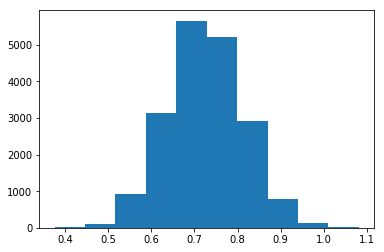

In [29]:
from matplotlib import pyplot as plt
plt.hist(result.values())
plt.show()

In [6]:
import itertools

In [51]:
import tensorflow as tf
import numpy as np

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [52]:
def choose_random_centroids(samples, n_clusters):
    # Step 0: Initialisation: Select `n_clusters` number of random points
    n_samples = tf.shape(samples)[0]
    random_indices = tf.random_shuffle(tf.range(0, n_samples))
    begin = [0,]
    size = [n_clusters,]
    size[0] = n_clusters
    centroid_indices = tf.slice(random_indices, begin, size)
    initial_centroids = tf.gather(samples, centroid_indices)
    return initial_centroids

In [53]:
n_features = 2
n_clusters = 3
n_samples_per_cluster = 500
seed = 700
embiggen_factor = 70

In [ ]:
model = tf.global_variables_initializer()
with tf.Session() as session:
    